In [1]:
import re
import warnings

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
path_of_train= "../data/train.csv"
path_of_test= "../data/test.csv"

df_train=pd.read_csv(path_of_train)
df_test=pd.read_csv(path_of_test)

In [3]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Kredi Puanı Veri Seti Kolon Açıklamaları

| Kolon Adı                 | Açıklama                                                                 | Mevcut Tür     | Olması Gereken Tür     |
|---------------------------|--------------------------------------------------------------------------|----------------|------------------------|
| ID                        | Bir girişin benzersiz kimliğini temsil eder                              | object         | Silinecek              |
| Customer_ID               | Bir kişinin benzersiz kimliğini temsil eder                              | object         | Silinecek              |
| Month                     | Yılın ayını temsil eder                                                  | object         | object (kategori)      |
| Name                      | Bir kişinin ismini temsil eder                                           | object         | object                 |
| Age                       | Kişinin yaşını temsil eder                                               | object         | int                    |
| SSN                       | Bir kişinin sosyal güvenlik numarasını temsil eder                       | object         | Silinecek              |
| Occupation                | Kişinin mesleğini temsil eder                                            | object         | object (kategori)      |
| Annual_Income             | Kişinin yıllık gelirini temsil eder                                      | object         | float                  |
| Monthly_Inhand_Salary     | Aylık baz maaşı temsil eder                                              | float64        | float                  |
| Num_Bank_Accounts         | Banka hesabı sayısını temsil eder                                        | int64          | int                    |
| Num_Credit_Card           | Diğer kredi kartı sayısını temsil eder                                   | int64          | int                    |
| Interest_Rate             | Kredi kartı faiz oranını temsil eder                                     | int64          | int                    |
| Num_of_Loan               | Bankadan alınan kredi sayısını temsil eder                               | object         | int                    |
| Type_of_Loan              | Alınan kredi türlerini temsil eder                                       | object         | object (kategori)      |
| Delay_from_due_date       | Geciken ortalama gün sayısını temsil eder                                | int64          | int                    |
| Num_of_Delayed_Payment    | Geciktirilen ortalama ödeme sayısını temsil eder                         | object         | int                    |
| Changed_Credit_Limit       | Kredi limitindeki yüzde değişimini temsil eder                           | object         | float                  |
| Num_Credit_Inquiries      | Kredi sorgularının sayısını temsil eder                                  | float64        | float                  |
| Credit_Mix                | Kredi karışım sınıfını temsil eder                                       | object         | object (kategori)      |
| Outstanding_Debt          | Kalan borç tutarını temsil eder (USD)                                    | object         | float                  |
| Credit_Utilization_Ratio  | Kredi kullanım oranını temsil eder                                       | float64        | float                  |
| Credit_History_Age        | Kredi geçmişinin süresini temsil eder                                    | object         | object                 |
| Payment_of_Min_Amount     | Sadece asgari ödeme yapılıp yapılmadığını belirtir                        | object         | object (kategori)      |
| Total_EMI_per_month       | Aylık EMI ödemelerini temsil eder (USD)                                  | float64        | float                  |
| Amount_invested_monthly   | Aylık yatırım tutarını temsil eder (USD)                                 | object         | float                  |
| Payment_Behaviour         | Müşterinin ödeme davranışını temsil eder                                 | object         | object (kategori)      |
| Monthly_Balance           | Aylık bakiye tutarını temsil eder (USD)                                  | object         | float                  |
| Credit_Score              | Kredi puanı aralığını temsil eder (Kötü, Standart, İyi)                  | object          | dönüştürdük               |

In [4]:
def explore_dataset(df):
    print("\n" + "="*50)
    print(f"📊 Dataset Overview")
    print("="*50)

    print(f"\n🔹 Shape: {df.shape}")
    print("\n🔹 Column Types:")
    print(df.dtypes)

    print("\n🔹 Missing Values:")
    print(df.isnull().sum())

    print("\n🔹 General Info:")
    print(df.info())

    print("\n🔹 Statistical Summary:")
    print(df.describe())

    print("\n🔹 First 5 Rows:")
    print(df.head())

    print("\n🔹 Last 5 Rows:")
    print(df.tail())

    print("="*50)



explore_dataset(df_test)


📊 Dataset Overview

🔹 Shape: (50000, 27)

🔹 Column Types:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Month

In [5]:
explore_dataset(df_train)


📊 Dataset Overview

🔹 Shape: (100000, 28)

🔹 Column Types:
ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Mont

Atılacak: ID , Name , SSN

Çevrilecek: Age(int), Annual_income(int), Num of loan(int)  Num_of_Delayed_Payment Changed_Credit_Limit Payment_of_Min_Amount Outstanding_Debt  Outstanding_Debt(Ay cinsinden bırakalım)  Amount_invested_monthly Monthly_Balance
Doldurulacak: MonthlySalary
Encode: Type of loan Credit_Mix   Payment_of_Min_Amount   Payment_Behaviour



In [6]:
df_train.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [7]:
df_train= df_train.drop(columns=["ID","Name","SSN"])
df_test= df_test.drop(columns=["ID","Name","SSN"])

In [8]:

def clean_and_cap_age_column(df, column='Age'):
    """
    Belirtilen DataFrame'deki Age sütununu temizler ve uç değerleri sınırlar.

    - Alt çizgileri kaldırır
    - Sayıya çevirir (hatalı verileri NaN yapar)
    - 100'den büyükleri 100, 18'den küçükleri 18 yapar

    Returns:
        DataFrame (yaş sütunu güncellenmiş şekilde)
    """
    df[column] = df[column].replace("_", "", regex=True)
    df[column] = pd.to_numeric(df[column], errors="coerce")
    df[column] = df[column].apply(lambda x: 85 if x > 85 else 18 if x < 18 else x)
    return df

df_train=clean_and_cap_age_column(df_train)
df_test=clean_and_cap_age_column(df_test)

In [9]:
print(df_train["Age"].describe())
print(df_test["Age"].describe())

count    100000.000000
mean         34.301950
std          12.642943
min          18.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          85.000000
Name: Age, dtype: float64
count    50000.000000
mean        34.746220
std         12.636291
min         18.000000
25%         25.000000
50%         34.000000
75%         43.000000
max         85.000000
Name: Age, dtype: float64


In [10]:
print("Train veri setindeki sayı olmayan değerler:")
print(df_train[~df_train["Annual_Income"].apply(lambda x: str(x).replace(".", "").isdigit())]["Annual_Income"])

print("\nTest veri setindeki sayı olmayan değerler:")
print(df_test[~df_test["Annual_Income"].apply(lambda x: str(x).replace(".", "").isdigit())]["Annual_Income"])

Train veri setindeki sayı olmayan değerler:
10        34847.84_
27        30689.89_
32        35547.71_
56        34081.38_
66       114838.41_
            ...    
99959     38321.39_
99974     16680.35_
99981      37188.1_
99993     39628.99_
99999     39628.99_
Name: Annual_Income, Length: 6980, dtype: object

Test veri setindeki sayı olmayan değerler:
65        92047.08_
67        92047.08_
84       10183.015_
87       10183.015_
140        71681.4_
            ...    
49903     14937.49_
49917      71025.4_
49918      71025.4_
49970     22620.79_
49977     38321.39_
Name: Annual_Income, Length: 3520, dtype: object


In [11]:
df_train["Annual_Income"] = df_train["Annual_Income"].replace("_", "", regex=True)
df_train["Annual_Income"] = pd.to_numeric(df_train["Annual_Income"], errors="coerce")

df_test["Annual_Income"] = df_test["Annual_Income"].replace("_", "", regex=True)
df_test["Annual_Income"] = pd.to_numeric(df_test["Annual_Income"], errors="coerce")

pd.options.display.float_format = '{:,.2f}'.format

print(df_train["Annual_Income"].describe())
print(df_test["Annual_Income"].describe())
print(df_train["Annual_Income"].isnull().sum())

count      100,000.00
mean       176,415.70
std      1,429,618.05
min          7,005.93
25%         19,457.50
50%         37,578.61
75%         72,790.92
max     24,198,062.00
Name: Annual_Income, dtype: float64
count       50,000.00
mean       166,334.20
std      1,351,965.47
min          7,005.93
25%         19,453.33
50%         37,577.82
75%         72,817.02
max     24,137,255.00
Name: Annual_Income, dtype: float64
0


In [12]:
col_name="Num_of_Loan"

mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)
# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, "Num_of_Loan"].unique())

8661
['-100' '0_' '3_' '2_' '5_' '8_' '9_' '4_' '7_' '1_' '6_' '597_' '92_'
 '1347_' '1185_' '235_' '1459_' '1320_' '630_' '359_' '1225_' '131_'
 '1311_' '1129_' '785_' '143_' '1131_' '27_' '1171_' '227_' '378_' '1219_'
 '527_' '1027_' '696_' '1132_']


In [13]:
df_train["Num_of_Loan"] = df_train["Num_of_Loan"].replace("_", "", regex=True)
df_train["Num_of_Loan"] = pd.to_numeric(df_train["Num_of_Loan"], errors="coerce")
df_train["Num_of_Loan"]= df_train["Num_of_Loan"].apply(lambda x: 0 if x <= 0 else x)


df_test["Num_of_Loan"] = df_test["Num_of_Loan"].replace("_", "", regex=True)
df_test["Num_of_Loan"] = pd.to_numeric(df_test["Num_of_Loan"], errors="coerce")
df_test["Num_of_Loan"]= df_test["Num_of_Loan"].apply(lambda x: 0 if x <= 0 else x)

print(df_train["Num_of_Loan"].describe())
print(df_test["Num_of_Loan"].describe())

count   100,000.00
mean          6.89
std          59.15
min           0.00
25%           1.00
50%           3.00
75%           5.00
max       1,496.00
Name: Num_of_Loan, dtype: float64
count   50,000.00
mean         7.35
std         62.98
min          0.00
25%          1.00
50%          3.00
75%          5.00
max      1,496.00
Name: Num_of_Loan, dtype: float64


In [14]:
col_name="Num_of_Delayed_Payment"

mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

3366
['8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '10_' '183_'
 '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '-2' '15_' '26_'
 '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_' '-1_' '1323_'
 '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_' '3840_'
 '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']


In [15]:
col_name="Num_of_Delayed_Payment"
df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")
df_train[col_name]= df_train[col_name].apply(lambda x: 0 if x <= 0 else x)

df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")
df_test[col_name]= df_test[col_name].apply(lambda x: 0 if x <= 0 else x)
print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   92,998.00
mean        30.93
std        226.03
min          0.00
25%          9.00
50%         14.00
75%         18.00
max      4,397.00
Name: Num_of_Delayed_Payment, dtype: float64
count   46,502.00
mean        30.90
std        221.51
min          0.00
25%          9.00
50%         14.00
75%         18.00
max      4,399.00
Name: Num_of_Delayed_Payment, dtype: float64


In [16]:
col_name = "Changed_Credit_Limit"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

3677
['_' '-2.01' '-1.01' '-3.01' '-1.2400000000000002' '-4.14' '-0.14' '-2.87'
 '-2.46' '-4.26' '-1.2599999999999998' '-1.33' '-1.4900000000000002'
 '-0.31000000000000005' '-1.4800000000000004' '-1.0599999999999996'
 '-2.17' '-1.1' '-0.049999999999999815' '-5.48' '-4.48'
 '-1.2800000000000002' '-1.93' '-1.94' '-5.02' '-4.2'
 '-0.040000000000000036' '-2.11' '-3.37' '-3.43' '-0.43000000000000016'
 '-3.69' '-2.69' '-3.52' '-1.0099999999999998' '-0.31999999999999995'
 '-3.58' '-0.05000000000000005' '-4.76' '-1.76' '-0.5'
 '-1.7999999999999998' '-0.7999999999999998' '-3.5' '-3.93' '-5.78'
 '-1.29' '-0.29000000000000004' '-3.67' '-1.28' '-1.21' '-2.52'
 '-0.5199999999999996' '-4.19' '-0.7400000000000002' '-2.34'
 '-0.33999999999999986' '-0.2599999999999998' '-1.6500000000000004'
 '-0.020000000000000014' '-1.16' '-2.16' '-5.63' '-2.37' '-2.49'
 '-0.07999999999999996' '-4.33' '-6.48' '-0.48' '-0.7000000000000002'
 '-0.7' '-1.6399999999999997' '-0.6200000000000001' '-1.13' '-2.13'
 '-4.59' '-2

In [17]:
col_name="Changed_Credit_Limit"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")

print(df_train[col_name].describe())
print(df_test[col_name].describe())


count   97,909.00
mean        10.39
std          6.79
min         -6.49
25%          5.32
50%          9.40
75%         14.87
max         36.97
Name: Changed_Credit_Limit, dtype: float64
count   48,941.00
mean        10.37
std          6.78
min         -6.45
25%          5.34
50%          9.41
75%         14.80
max         36.65
Name: Changed_Credit_Limit, dtype: float64


In [18]:
col_name = "Payment_of_Min_Amount"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())

# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())



map_for_min_amount = {
    "NM": -1,
    "No":0,
    "Yes":1
}
df_train[col_name] = df_train[col_name].map(map_for_min_amount)
df_test[col_name] = df_test[col_name].map(map_for_min_amount)

print(df_train[col_name].describe())
print(df_test[col_name].describe())

#NMyi na yap

100000
['No' 'NM' 'Yes']
count   100,000.00
mean          0.40
std           0.69
min          -1.00
25%           0.00
50%           1.00
75%           1.00
max           1.00
Name: Payment_of_Min_Amount, dtype: float64
count   50,000.00
mean         0.40
std          0.69
min         -1.00
25%          0.00
50%          1.00
75%          1.00
max          1.00
Name: Payment_of_Min_Amount, dtype: float64


In [19]:
col_name="Outstanding_Debt"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())
# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

1009
['1328.93_' '1283.37_' '2797.17_' '3818.57_' '343.84_' '363.51_' '404.51_'
 '1755.81_' '2593.44_' '89.62_' '1054.86_' '1374.23_' '1166.47_' '457.81_'
 '1684.06_' '1126.35_' '2098.83_' '761.18_' '1343.01_' '1342.61_'
 '1435.94_' '2354.21_' '1319.87_' '821.27_' '3271.84_' '465.04_' '218.25_'
 '1274.59_' '1033.59_' '642.42_' '94.75_' '4145.87_' '328.41_' '4813.02_'
 '477.41_' '165.88_' '1286.68_' '128.33_' '2106.68_' '3078.82_' '634.77_'
 '878.19_' '2518.51_' '1235.48_' '669.35_' '240.6_' '70.66_' '3099.57_'
 '486.48_' '1124.37_' '152.6_' '1716.82_' '886.09_' '1370.48_' '640.4_'
 '484.43_' '1417.89_' '1539.61_' '2517.0_' '539.59_' '802.47_' '289.1_'
 '4542.88_' '590.85_' '155.2_' '697.86_' '825.25_' '1644.31_' '960.38_'
 '282.06_' '985.01_' '1491.56_' '3723.83_' '1350.6_' '1248.05_' '3531.62_'
 '1017.45_' '60.04_' '2468.2_' '2234.83_' '1073.76_' '4972.01_' '2107.76_'
 '3754.18_' '3656.46_' '291.71_' '281.42_' '1251.25_' '47.18_' '381.06_'
 '174.79_' '4375.21_' '1412.35_' '2296.23_' '

In [20]:
col_name="Outstanding_Debt"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")

print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   100,000.00
mean      1,426.22
std       1,155.13
min           0.23
25%         566.07
50%       1,166.15
75%       1,945.96
max       4,998.07
Name: Outstanding_Debt, dtype: float64
count   50,000.00
mean     1,426.22
std      1,155.13
min          0.23
25%        566.07
50%      1,166.15
75%      1,945.96
max      4,998.07
Name: Outstanding_Debt, dtype: float64


In [21]:
col_name="Amount_invested_monthly"
mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())
# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

4305
['__10000__']


In [22]:
col_name="Amount_invested_monthly"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")

print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   95,521.00
mean       637.41
std      2,043.32
min          0.00
25%         74.53
50%        135.93
75%        265.73
max     10,000.00
Name: Amount_invested_monthly, dtype: float64
count   47,729.00
mean       641.65
std      2,053.90
min          0.00
25%         74.53
50%        135.59
75%        266.89
max     10,000.00
Name: Amount_invested_monthly, dtype: float64


In [23]:
col_name="Monthly_Balance"

mask = df_train[col_name].notna() & df_train[col_name].str.contains(r"[^\d.]", regex=True)

# Kaç tane var?
print(mask.sum())
# Ne tür "bozuk" değerler var?
print(df_train.loc[mask, col_name].unique())

9
['__-333333333333333333333333333__']


In [24]:
col_name="Monthly_Balance"

df_train[col_name] = df_train[col_name].replace("_", "", regex=True)
df_train[col_name] = pd.to_numeric(df_train[col_name], errors="coerce")
df_train[col_name]= df_train[col_name].apply(lambda x: 0 if x <= 0 else x)


df_test[col_name] = df_test[col_name].replace("_", "", regex=True)
df_test[col_name] = pd.to_numeric(df_test[col_name], errors="coerce")
df_test[col_name]= df_test[col_name].apply(lambda x: 0 if x <= 0 else x)

print(df_train[col_name].describe())
print(df_test[col_name].describe())

count   98,800.00
mean       402.51
std        213.95
min          0.00
25%        270.09
50%        336.72
75%        470.22
max      1,602.04
Name: Monthly_Balance, dtype: float64
count   49,438.00
mean       403.02
std        213.72
min          0.00
25%        270.47
50%        336.97
75%        470.86
max      1,606.52
Name: Monthly_Balance, dtype: float64


In [25]:
df_train=pd.DataFrame(df_train,columns=df_train.columns)
df_test=pd.DataFrame(df_test,columns=df_test.columns)

In [26]:
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()

print("Unique Değerler")
for col in cat_cols:
    print(f"Unique values in {col}: {df_train[col].unique()}")
    print("\n")

print("Null Ratios")
for col in cat_cols:
    print(f"Null values in {col}: {df_train[col].isnull().sum()}")
    print("Ratio of null values: ", df_train[col].isnull().sum() / df_train.shape[0])
    print("\n")

Unique Değerler
Unique values in Customer_ID: ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']


Unique values in Month: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Unique values in Occupation: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Unique values in Type_of_Loan: ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


Unique values in Credit_Mix: ['_' 'Good' 'Standard' 'Bad']


Unique values in Credit_History_Age: ['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years a

In [27]:
numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()

print("Null Değerler")
for col in numeric_cols:
    print(f"Type of {col}: {df_train[col].dtype}")
    print(f"Null values in {col}: {df_train[col].isnull().sum()}")
    print("Ratio of null values: ", df_train[col].isnull().sum() / df_train.shape[0])
    print("")


Null Değerler
Type of Age: int64
Null values in Age: 0
Ratio of null values:  0.0

Type of Annual_Income: float64
Null values in Annual_Income: 0
Ratio of null values:  0.0

Type of Monthly_Inhand_Salary: float64
Null values in Monthly_Inhand_Salary: 15002
Ratio of null values:  0.15002

Type of Num_Bank_Accounts: int64
Null values in Num_Bank_Accounts: 0
Ratio of null values:  0.0

Type of Num_Credit_Card: int64
Null values in Num_Credit_Card: 0
Ratio of null values:  0.0

Type of Interest_Rate: int64
Null values in Interest_Rate: 0
Ratio of null values:  0.0

Type of Num_of_Loan: int64
Null values in Num_of_Loan: 0
Ratio of null values:  0.0

Type of Delay_from_due_date: int64
Null values in Delay_from_due_date: 0
Ratio of null values:  0.0

Type of Num_of_Delayed_Payment: float64
Null values in Num_of_Delayed_Payment: 7002
Ratio of null values:  0.07002

Type of Changed_Credit_Limit: float64
Null values in Changed_Credit_Limit: 2091
Ratio of null values:  0.02091

Type of Num_Credit

Mean: Credit_Utilization_Ratio \
Mode: Payment_of_Min_Amount  \
Geri kalanları medyan ile doldur

In [28]:
# Mean ile doldurulacak sütun
mean_fill_cols = ["Credit_Utilization_Ratio"]

# Mode ile doldurulacak sütun
mode_fill_cols = ["Payment_of_Min_Amount"]

# Geri kalanlar için median ile doldurma
def fill_missing_values(df):
    for col in mean_fill_cols:
        if col in df.columns:
            df[col].fillna(df[col].mean(), inplace=True)

    for col in mode_fill_cols:
        if col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

    for col in numeric_cols:
        if col not in mean_fill_cols + mode_fill_cols:
            df[col].fillna(df[col].median(), inplace=True)

# Uygulama
fill_missing_values(df_train)
fill_missing_values(df_test)

print(df_train[numeric_cols].isnull().sum())

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64


In [29]:
df_train[cat_cols].isnull().sum()

Customer_ID               0
Month                     0
Occupation                0
Type_of_Loan          11408
Credit_Mix                0
Credit_History_Age     9030
Payment_Behaviour         0
Credit_Score              0
dtype: int64

In [30]:
def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan

    years = 0
    months = 0

    # Yılları çıkar
    years_match = re.search(r'(\d+)\sYears', str(age_str))
    if years_match:
        years = int(years_match.group(1))

    # Ayları çıkar
    months_match = re.search(r'(\d+)\sMonths', str(age_str))
    if months_match:
        months = int(months_match.group(1))

    return years * 12 + months

df_train["Credit_History_Age"]= df_train["Credit_History_Age"].apply(convert_to_months)
df_test["Credit_History_Age"]=df_test["Credit_History_Age"].apply(convert_to_months)
print(df_train["Credit_History_Age"].describe())



count   90,970.00
mean       221.20
std         99.74
min          1.00
25%        144.00
50%        219.00
75%        302.00
max        404.00
Name: Credit_History_Age, dtype: float64


In [31]:
df_train["Credit_History_Age"]=df_train["Credit_History_Age"].fillna(df_train["Credit_History_Age"].median())
df_train["Credit_History_Age"].isnull().sum()

df_test["Credit_History_Age"]=df_test["Credit_History_Age"].fillna(df_test["Credit_History_Age"].median())


In [32]:
df_train["Type_of_Loan"]=df_train["Type_of_Loan"].fillna(df_train["Type_of_Loan"].mode()[0])
df_test["Type_of_Loan"]=df_test["Type_of_Loan"].fillna(df_test["Type_of_Loan"].mode()[0])

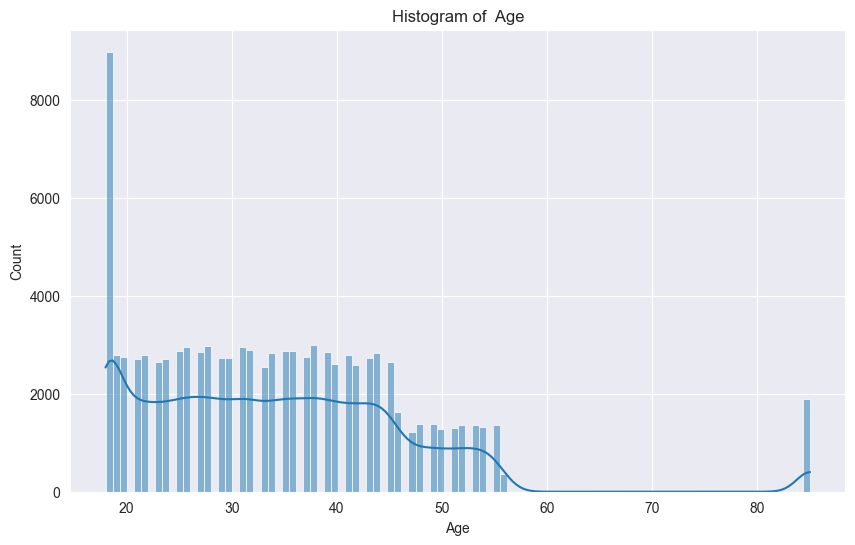

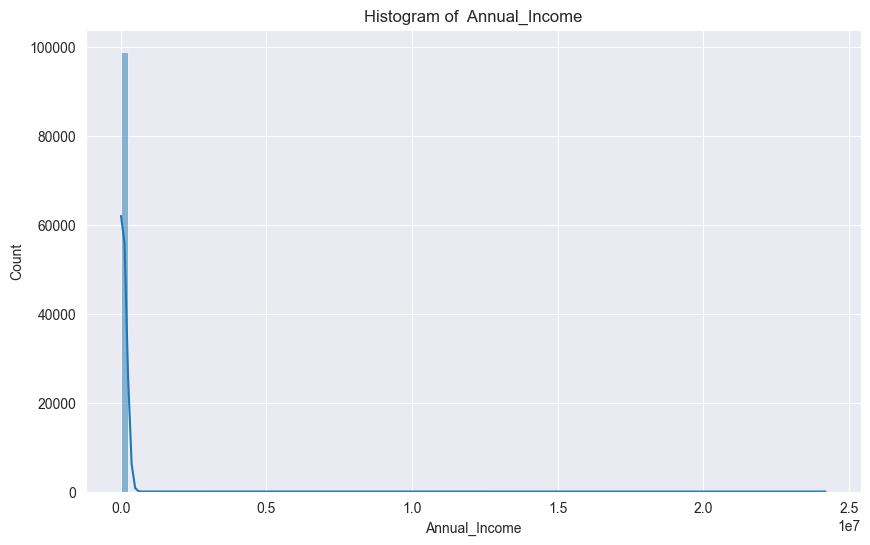

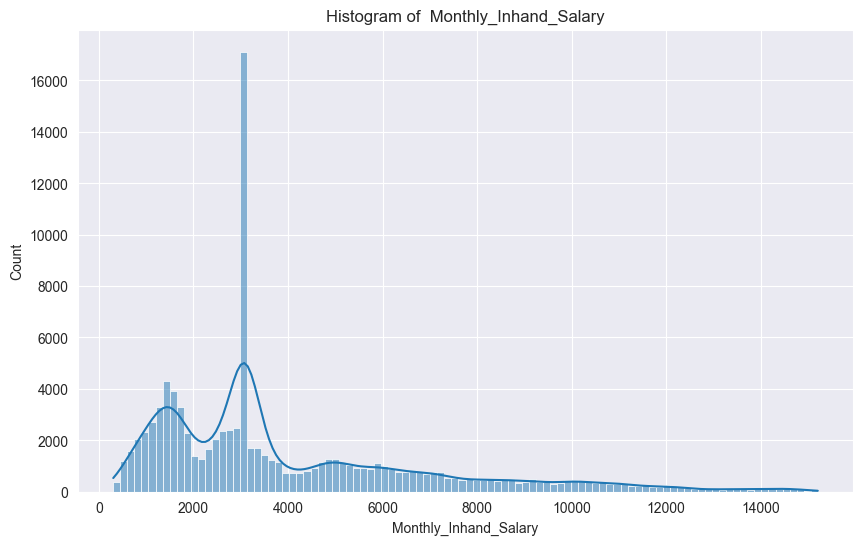

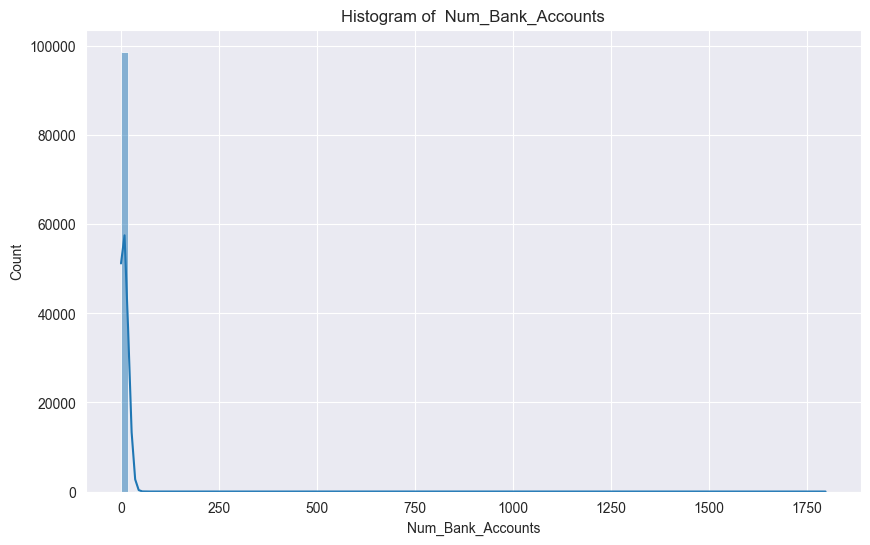

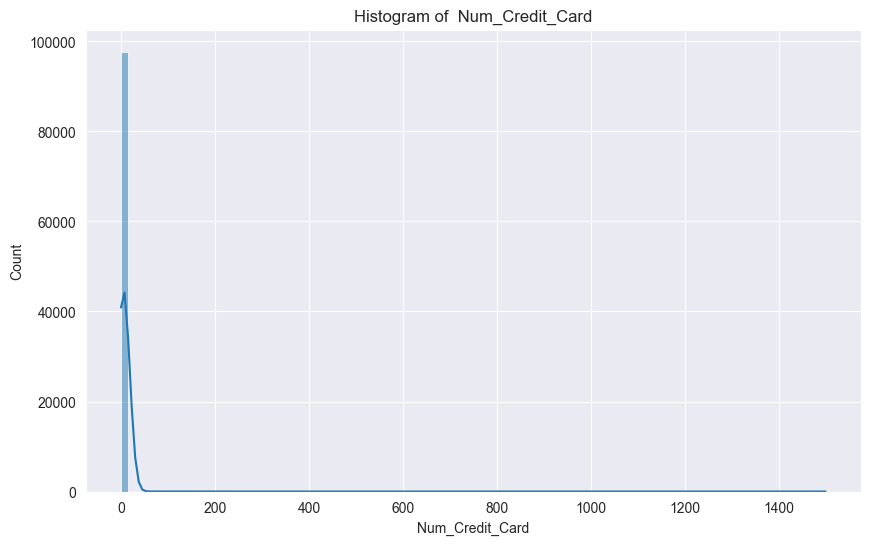

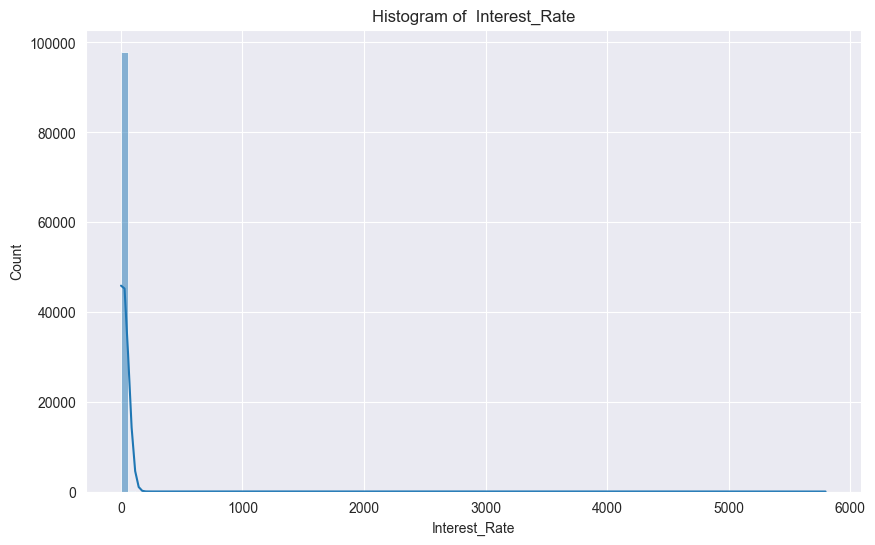

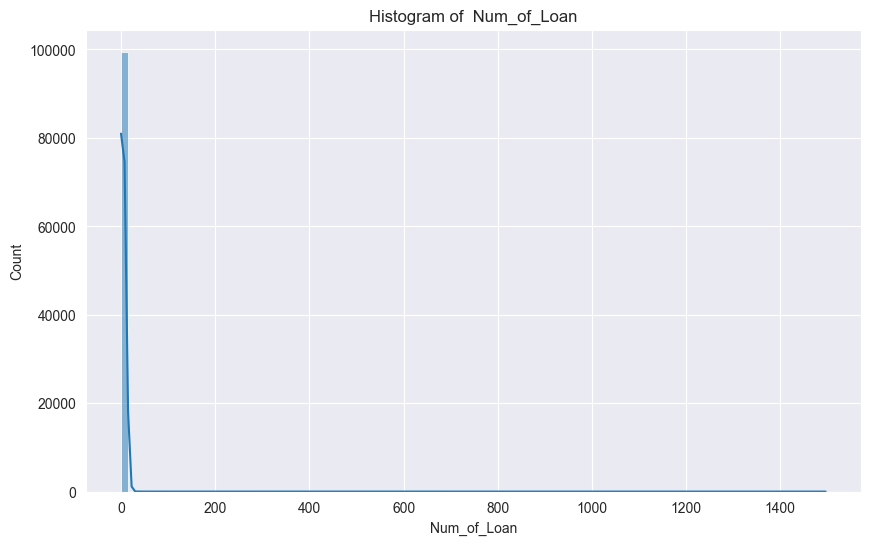

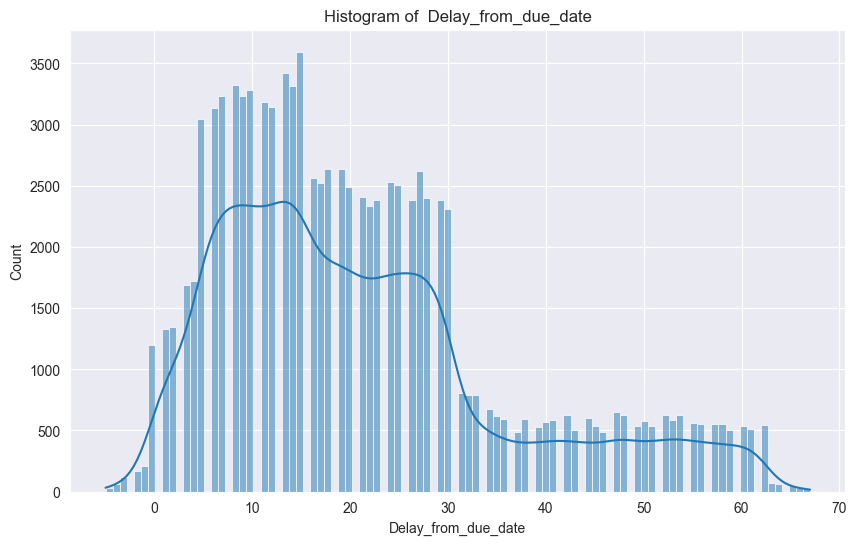

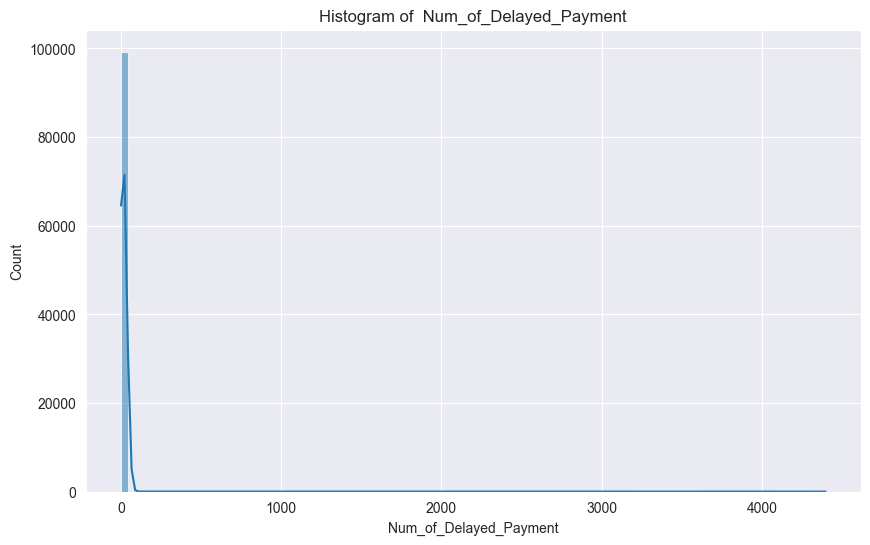

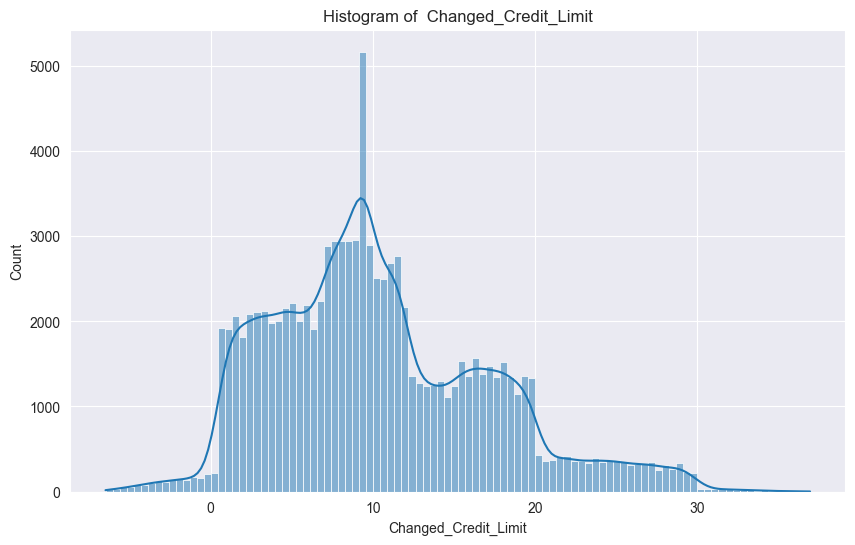

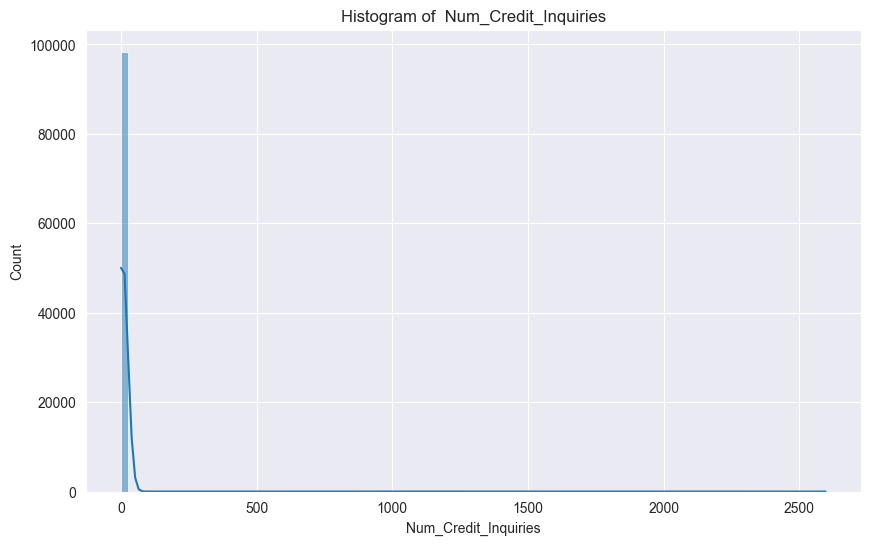

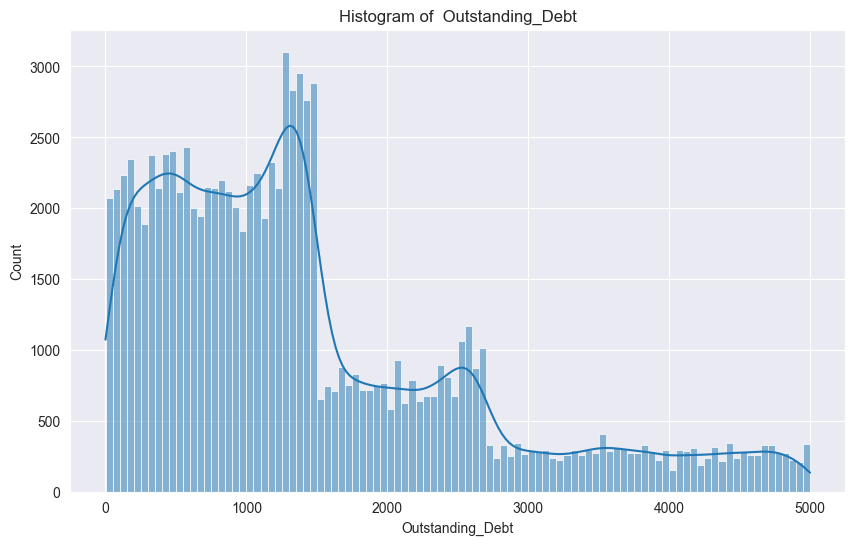

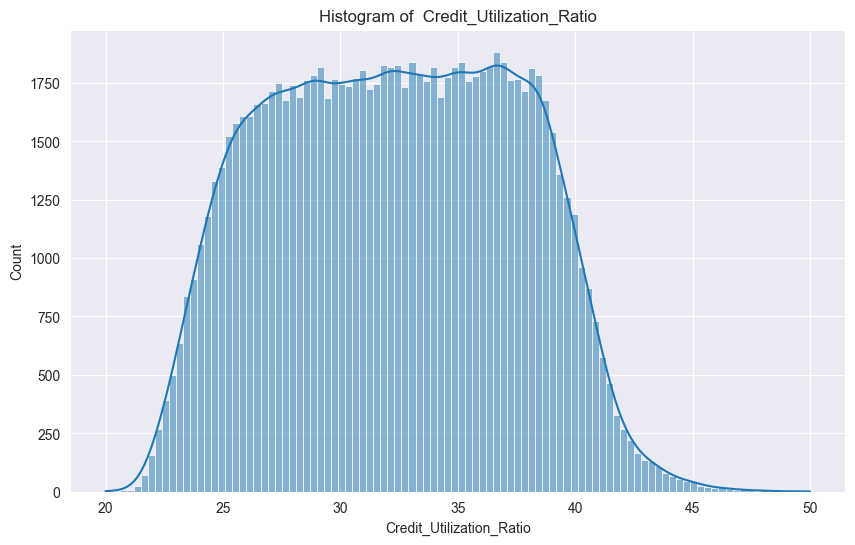

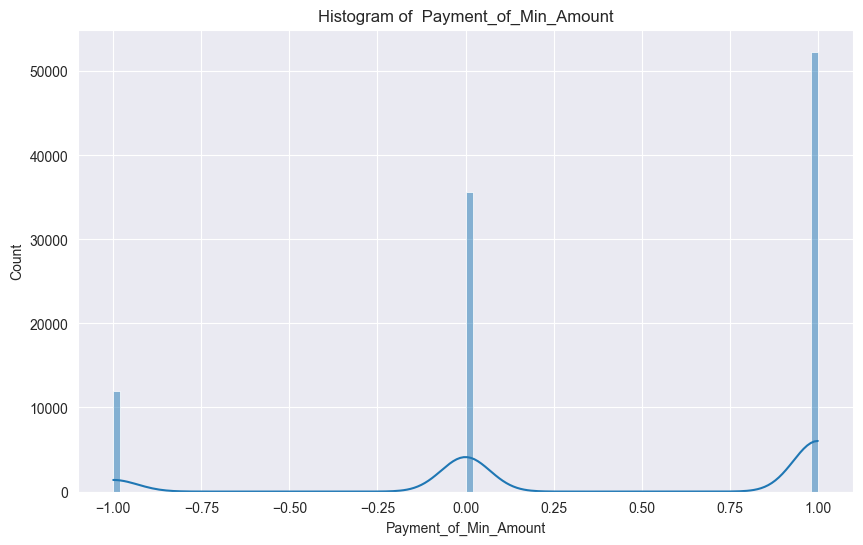

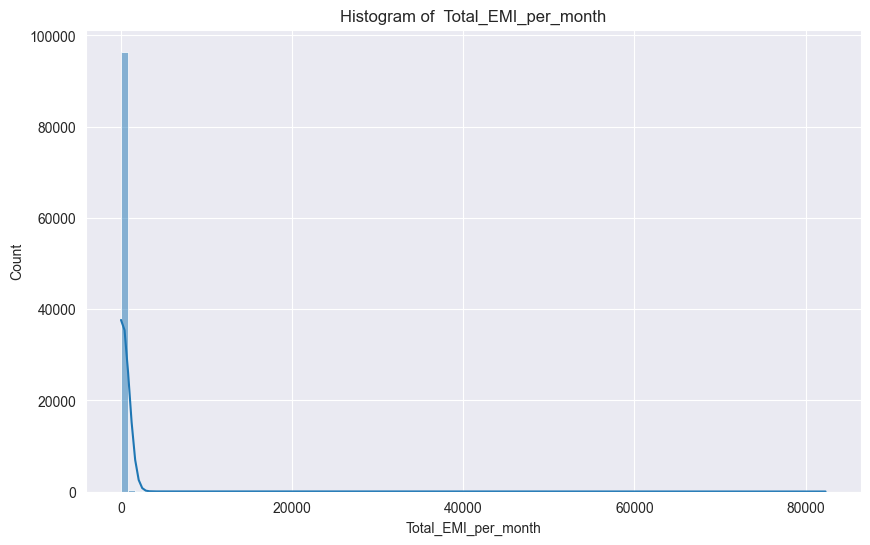

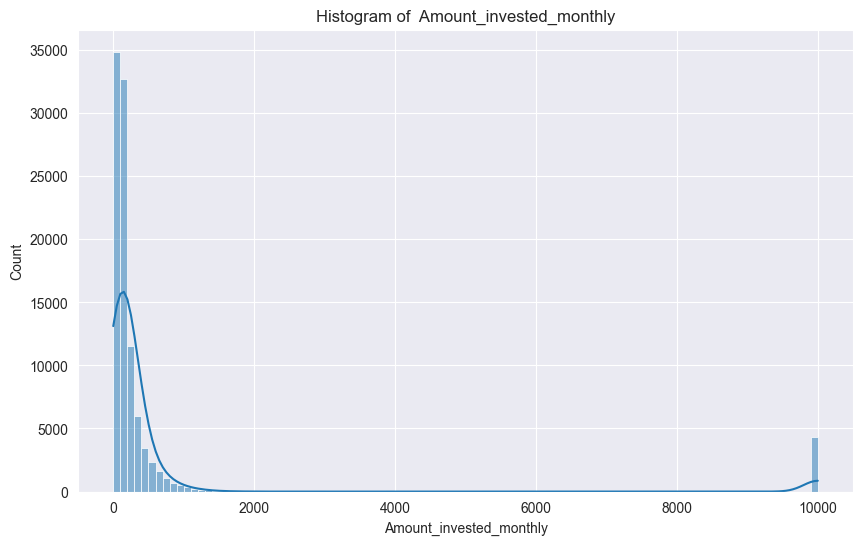

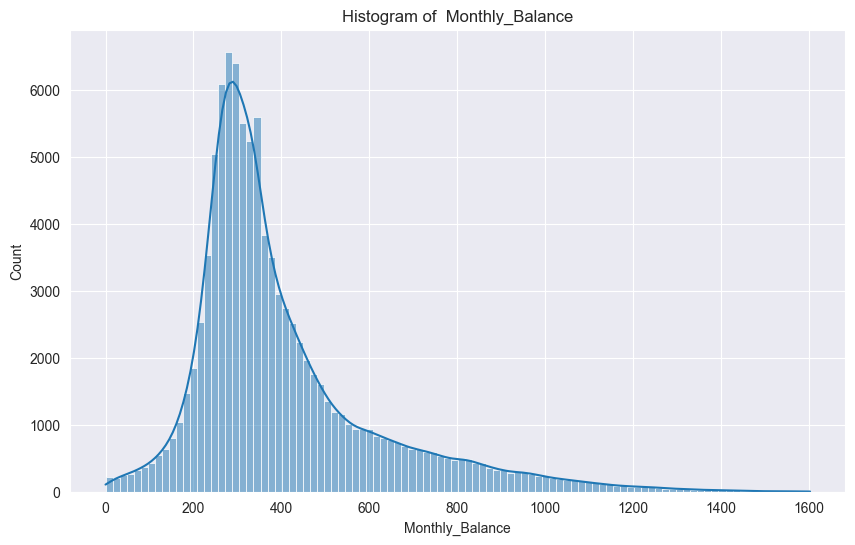

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
def visualize_numeric_cols_hist_plot(df,col_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=100,kde=True)
    plt.title(f"Histogram of  {col_name}")
    plt.show()

for col in numeric_cols:
    visualize_numeric_cols_hist_plot(df_train,col)

In [34]:
df_train.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [35]:
df_test.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [36]:
numeric_cols= df_train.select_dtypes(include=['number']).columns.tolist()
df_train[numeric_cols].describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count 100,000.00     100,000.00             100,000.00         100,000.00   
mean       34.30     176,415.70               4,029.08              17.09   
std        12.64   1,429,618.05               2,961.36             117.40   
min        18.00       7,005.93                 303.65              -1.00   
25%        24.00      19,457.50               1,792.08               3.00   
50%        33.00      37,578.61               3,093.75               6.00   
75%        42.00      72,790.92               5,371.53               7.00   
max        85.00  24,198,062.00              15,204.63           1,798.00   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count       100,000.00     100,000.00   100,000.00           100,000.00   
mean             22.47          72.47         6.89                21.07   
std             129.06         466.42        59.15                14.86   
min               0.00           1.00         0.00                -5.00   
25%               4.00           8.00         1.00                10.00   
50%               5.00          13.00         3.00                18.00   
75%               7.00          20.00         5.00                28.00   
max           1,499.00       5,797.00     1,496.00                67.00   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count              100,000.00            100,000.00            100,000.00   
mean                    29.75                 10.37                 27.33   
std                    218.02                  6.72                191.29   
min                      0.00                 -6.49                  0.00   
25%                      9.00                  5.42                  3.00   
50%                     14.00                  9.40                  6.00   
75%                     18.00                 14.66                  9.00   
max                  4,397.00                 36.97              2,597.00   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count        100,000.00                100,000.00          100,000.00   
mean           1,426.22                     32.29              221.00   
std            1,155.13                      5.12               95.13   
min                0.23                     20.00                1.00   
25%              566.07                     28.05              154.00   
50%            1,166.15                     32.31              219.00   
75%            1,945.96                     36.50              292.00   
max            4,998.07                     50.00              404.00   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
count             100,000.00           100,000.00               100,000.00   
mean                    0.40             1,403.12                   614.95   
std                     0.69             8,306.04                 1,999.73   
min                    -1.00                 0.00                     0.00   
25%                     0.00                30.31                    77.02   
50%                     1.00                69.25                   135.93   
75%                     1.00               161.22                   255.04   
max                     1.00            82,331.00                10,000.00   

       Monthly_Balance  
count       100,000.00  
mean            401.73  
std             212.78  
min               0.00  
25%             270.89  
50%             336.72  
75%             467.67  
max           1,602.04

In [37]:
def outlier_handling(df,col_name):
    q1=np.quantile(df[col_name],0.25)
    q3=np.quantile(df[col_name],0.75)
    IQR=q3-q1
    upper_limit=q3+1.5*IQR
    lower_limit=q1-1.5*IQR
    df[col_name]=df[col_name].apply(lambda x: lower_limit if x < lower_limit  else upper_limit if x > upper_limit else x)
    return df

numeric_cols=df_train.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove("Payment_of_Min_Amount")
for col in numeric_cols:
     df_train = outlier_handling(df_train,col)
     df_test = outlier_handling(df_test,col)



In [38]:
df_train[numeric_cols].describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count 100,000.00     100,000.00             100,000.00         100,000.00   
mean       34.00      51,253.26               3,956.89               5.47   
std        11.57      38,684.91               2,757.64               2.72   
min        18.00       7,005.93                 303.65              -1.00   
25%        24.00      19,457.50               1,792.08               3.00   
50%        33.00      37,578.61               3,093.75               6.00   
75%        42.00      72,790.92               5,371.53               7.00   
max        69.00     152,791.05              10,740.69              13.00   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
count       100,000.00     100,000.00   100,000.00           100,000.00   
mean              5.67          15.01         3.43                20.90   
std               2.23           9.26         2.54                14.43   
min               0.00           1.00         0.00                -5.00   
25%               4.00           8.00         1.00                10.00   
50%               5.00          13.00         3.00                18.00   
75%               7.00          20.00         5.00                28.00   
max              11.50          38.00        11.00                55.00   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count              100,000.00            100,000.00            100,000.00   
mean                    13.51                 10.35                  5.99   
std                      6.24                  6.67                  4.10   
min                      0.00                 -6.49                  0.00   
25%                      9.00                  5.42                  3.00   
50%                     14.00                  9.40                  6.00   
75%                     18.00                 14.66                  9.00   
max                     31.50                 28.52                 18.00   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count        100,000.00                100,000.00          100,000.00   
mean           1,399.86                     32.29              221.00   
std            1,086.19                      5.12               95.13   
min                0.23                     20.00                1.00   
25%              566.07                     28.05              154.00   
50%            1,166.15                     32.31              219.00   
75%            1,945.96                     36.50              292.00   
max            4,015.80                     49.16              404.00   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count           100,000.00               100,000.00       100,000.00  
mean                108.05                   191.31           387.09  
std                 104.53                   154.39           172.95  
min                   0.00                     0.00             0.00  
25%                  30.31                    77.02           270.89  
50%                  69.25                   135.93           336.72  
75%                 161.22                   255.04           467.67  
max                 357.60                   522.07           762.84

In [39]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import KNNImputer

# === 1. Eksik değerleri doldur ===
imputer1 = KNNImputer(n_neighbors=4)
imputer2 = KNNImputer(n_neighbors=4)

df_train[numeric_cols] = imputer1.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = imputer2.fit_transform(df_test[numeric_cols])



In [40]:
copy_train=df_train.copy()
copy_test=df_test.copy()

In [41]:
# Quantile sonrası clipping
# === 2. Quantile Transformer uygula ===
quantile_scaler = QuantileTransformer(output_distribution='normal', random_state=42)

df_train[numeric_cols] = quantile_scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = quantile_scaler.transform(df_test[numeric_cols])



for col in numeric_cols:
    df_train[col] = df_train[col].clip(-3, 3)
    df_test[col] = df_test[col].clip(-3, 3)


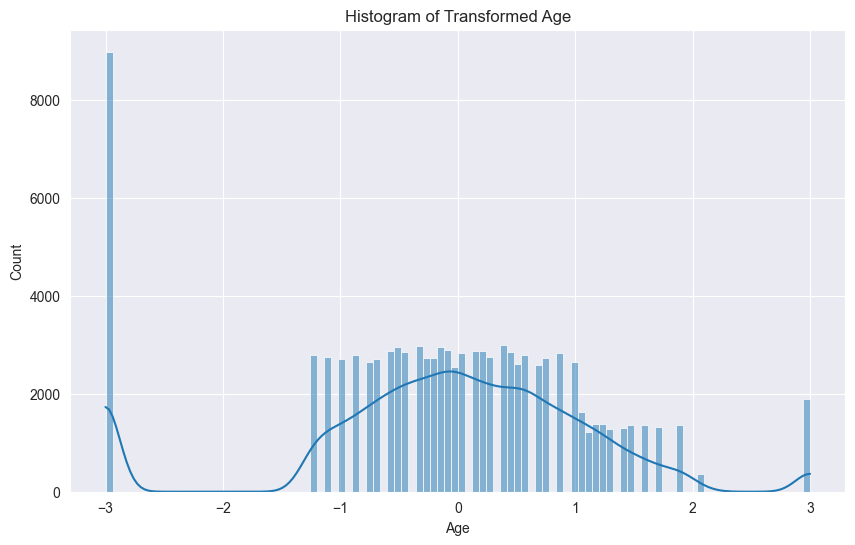

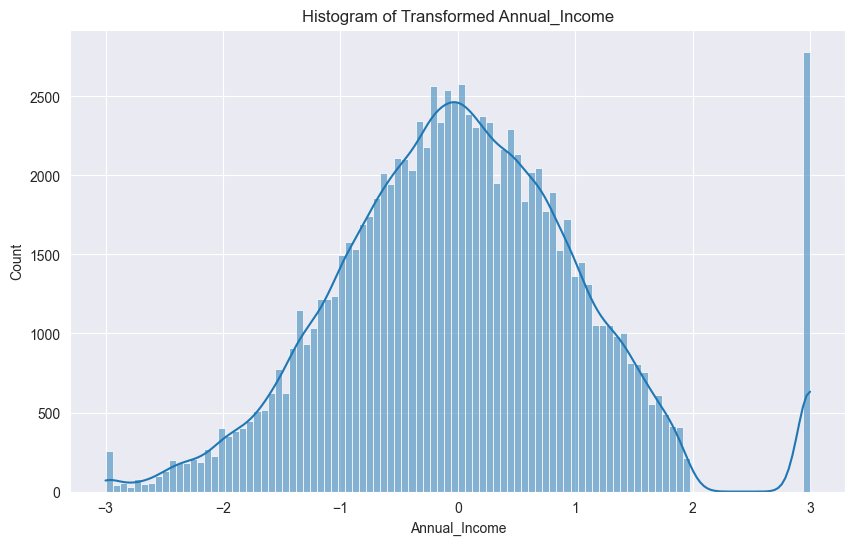

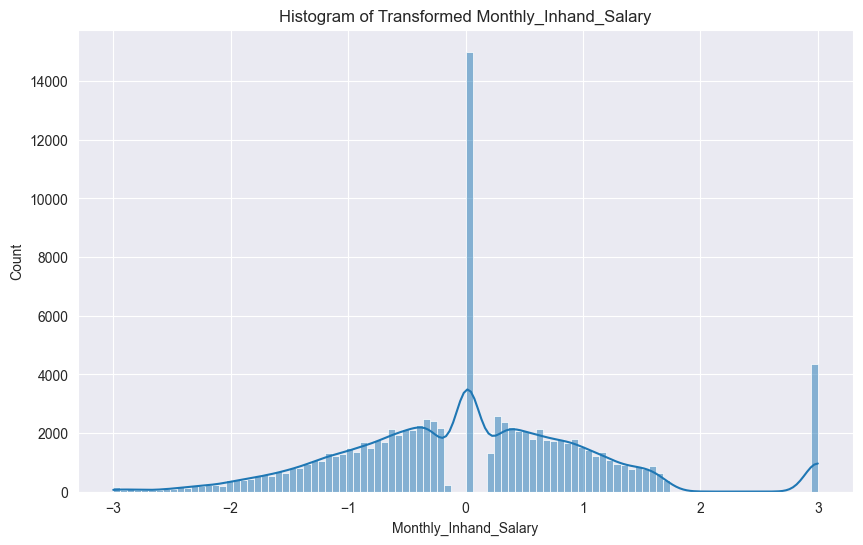

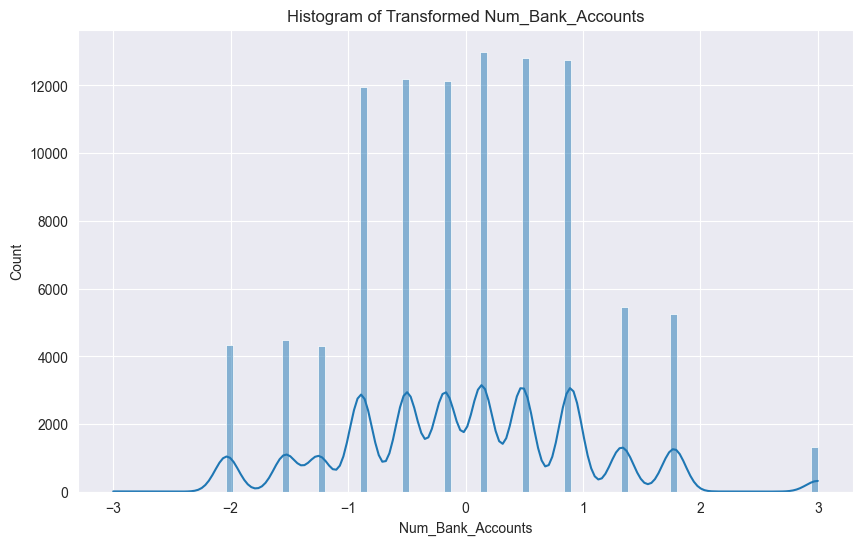

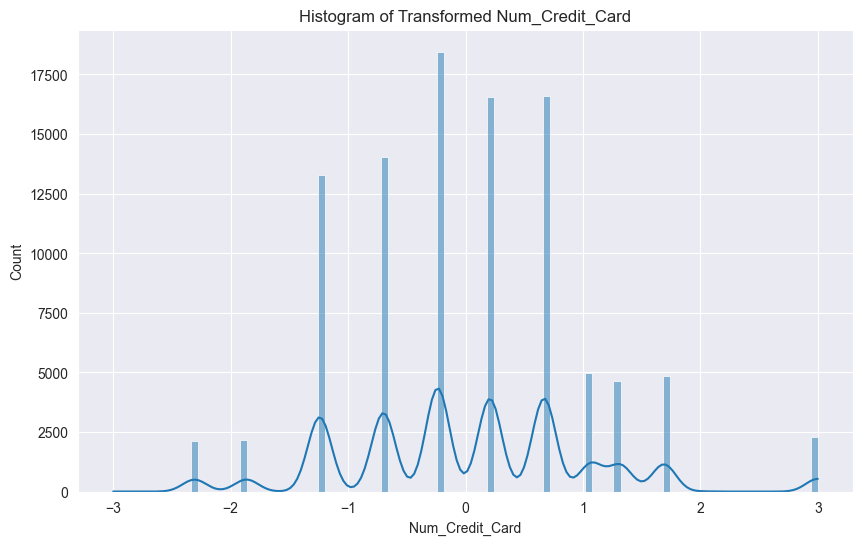

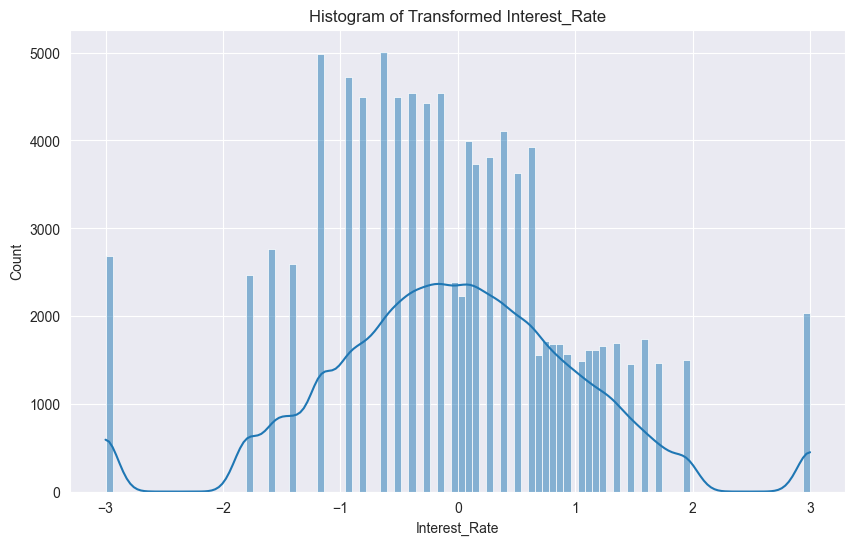

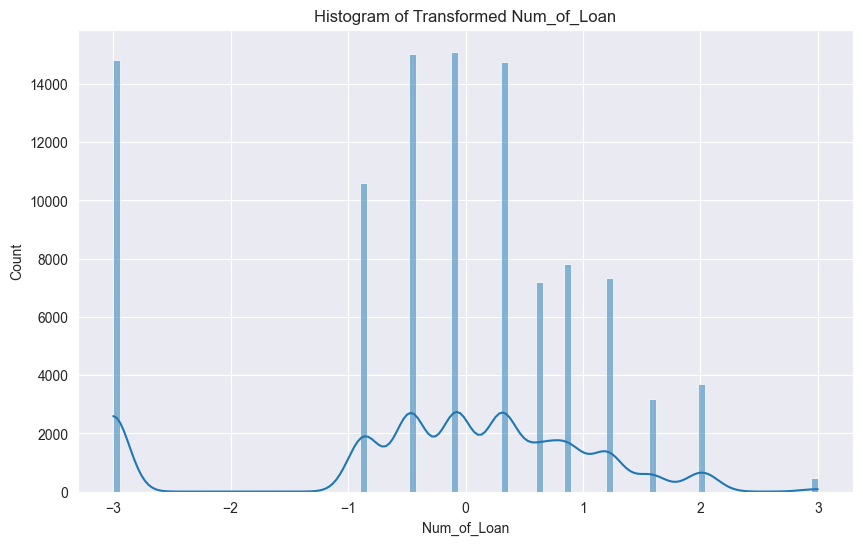

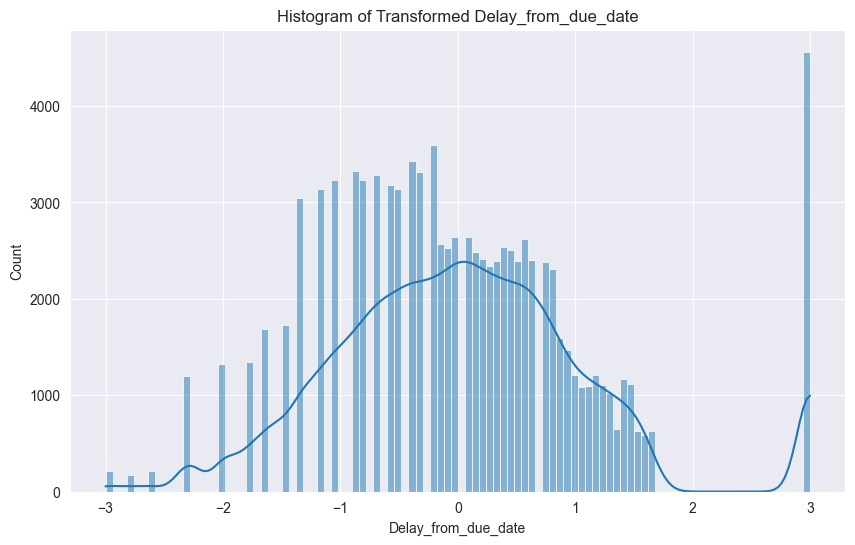

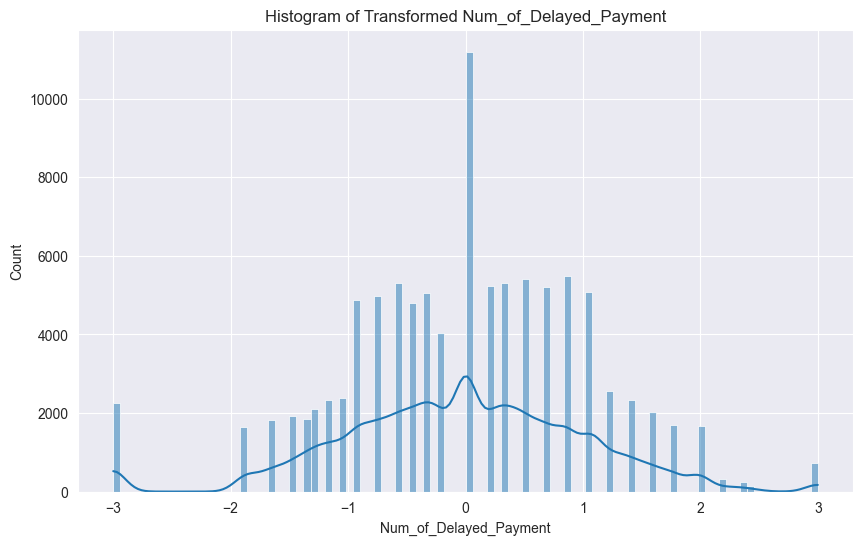

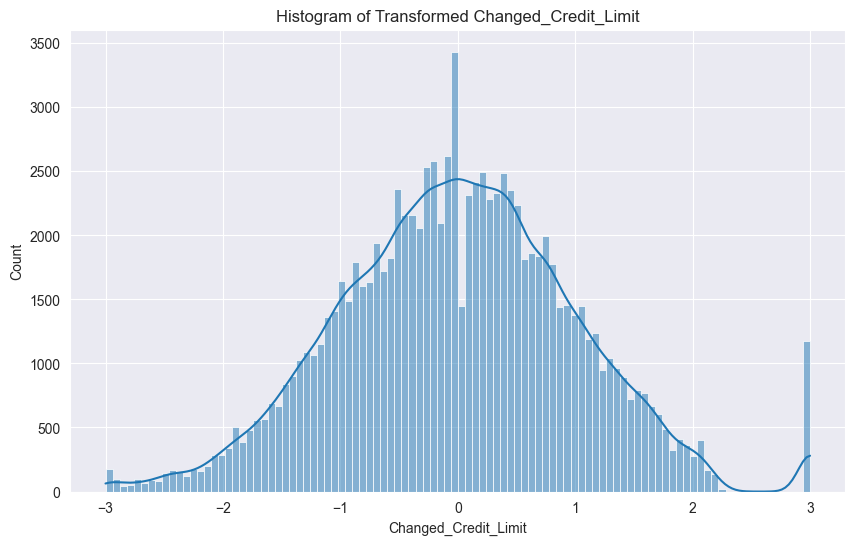

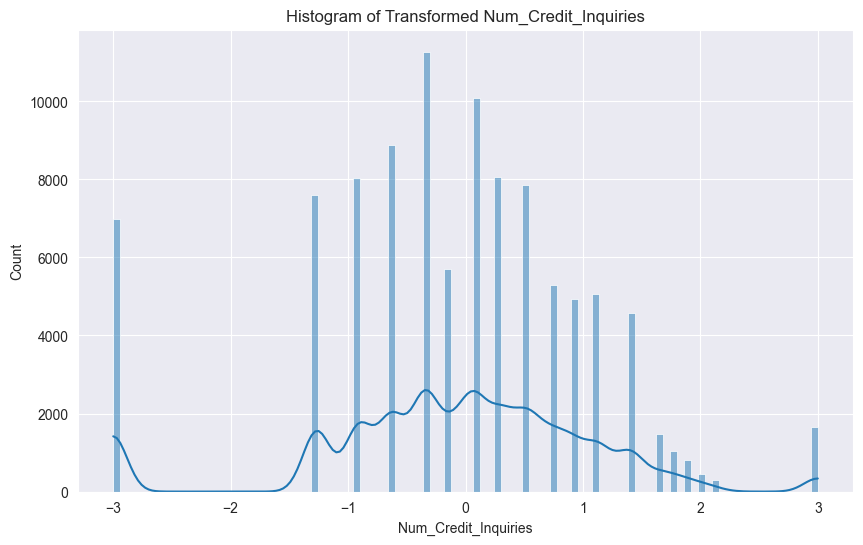

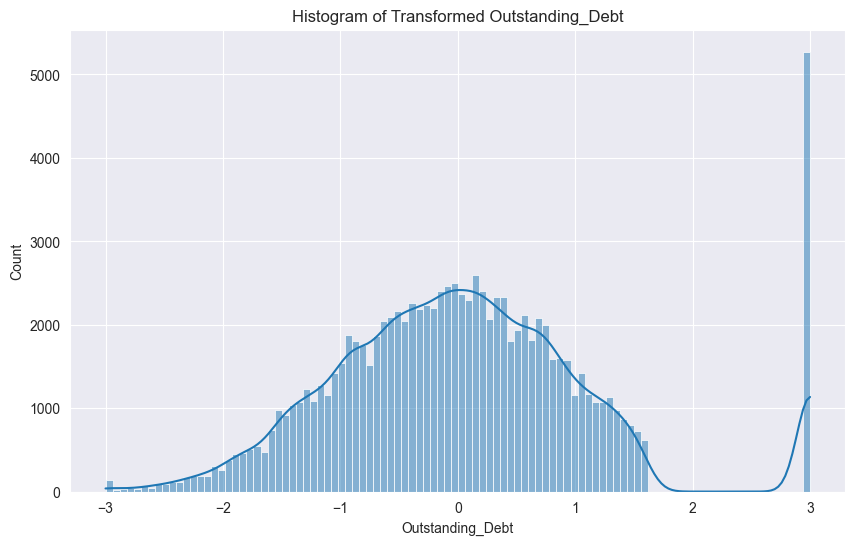

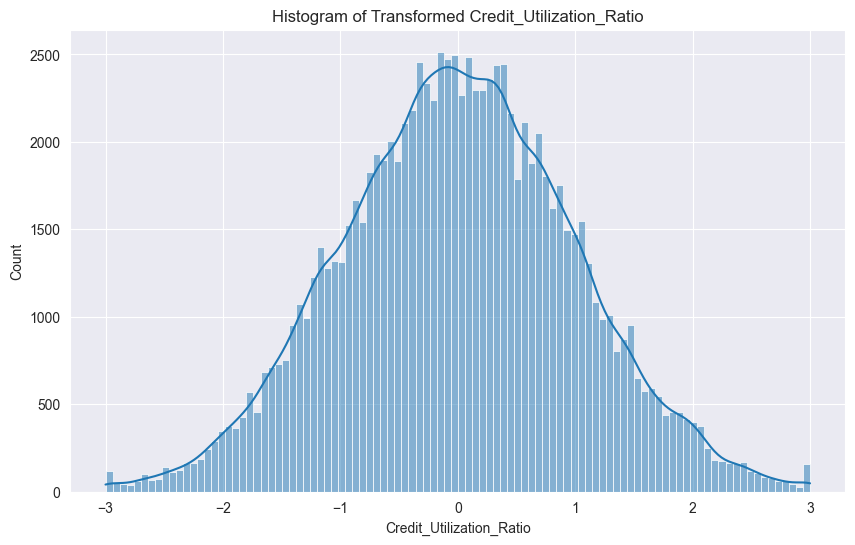

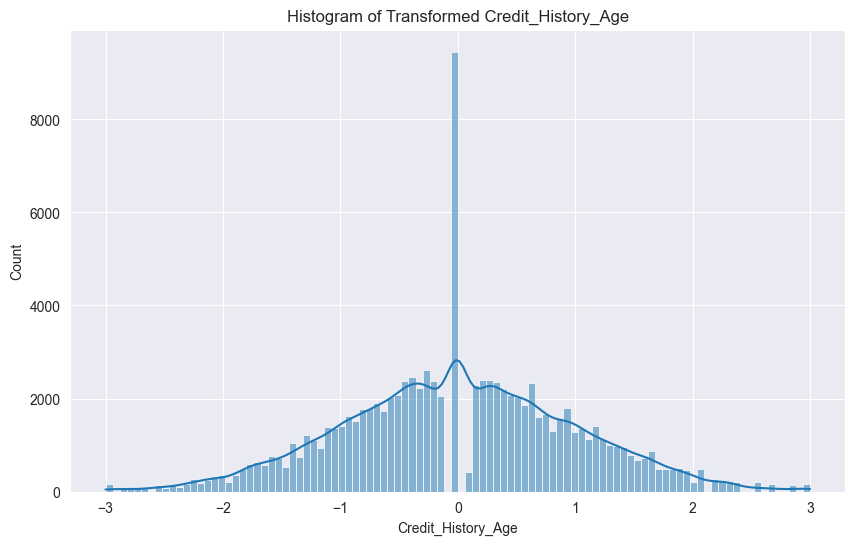

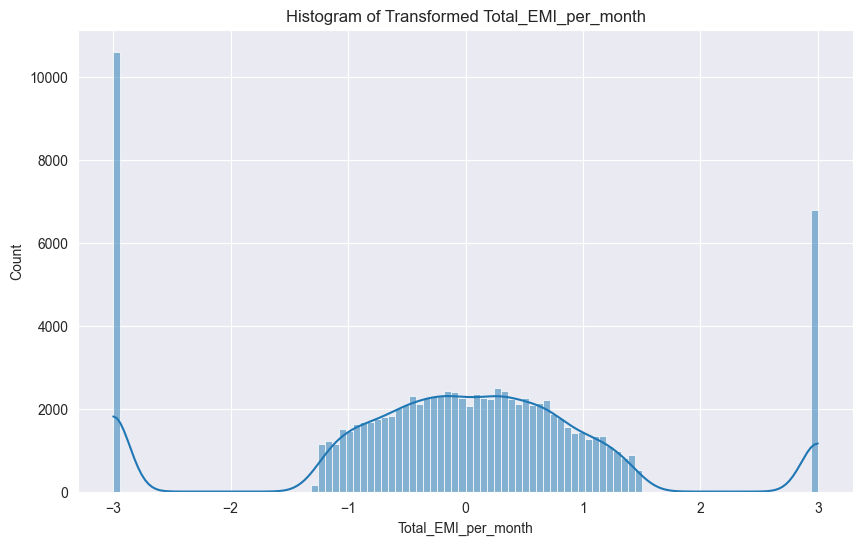

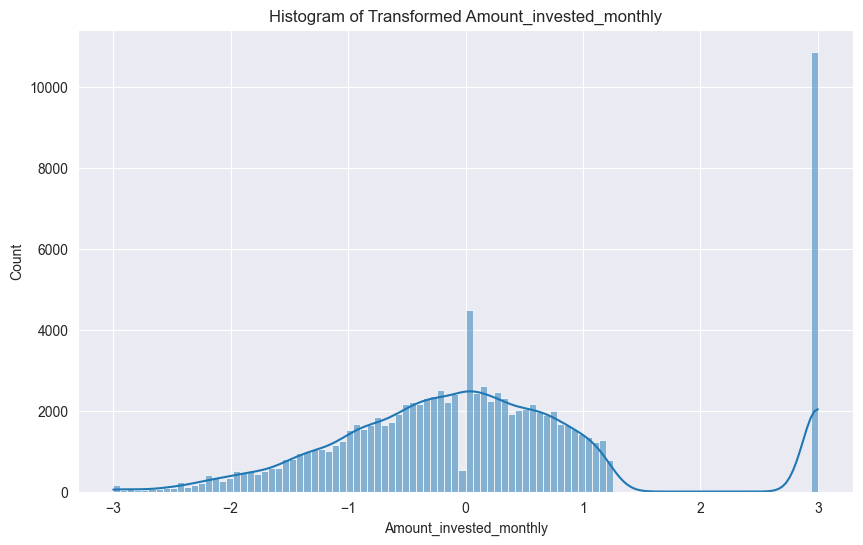

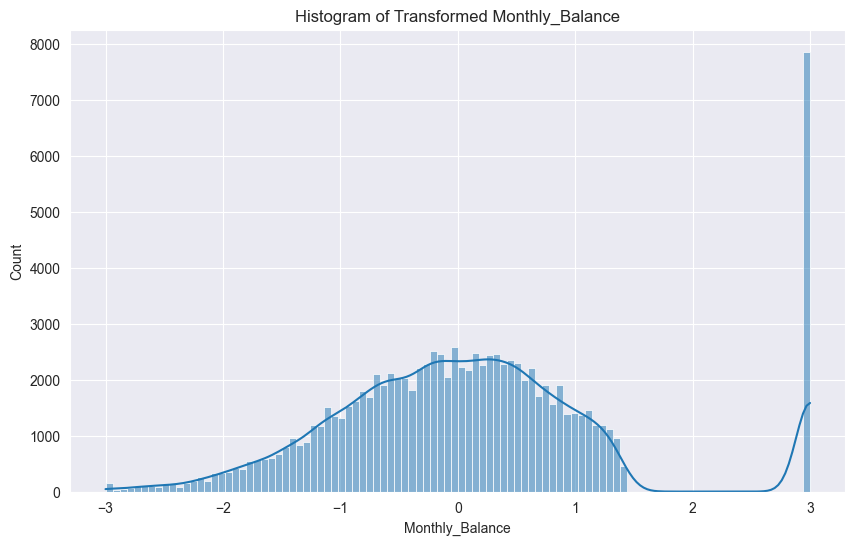

In [42]:
import seaborn as sns
def visualize_numeric_cols_hist_plot(df,col_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], bins=100,kde=True)
    plt.title(f"Histogram of Transformed {col_name}")
    plt.show()

for col in numeric_cols:
    visualize_numeric_cols_hist_plot(df_train,col)

In [43]:
(df_train[numeric_cols]<0).sum()

Age                         50860
Annual_Income               49513
Monthly_Inhand_Salary       42498
Num_Bank_Accounts           49397
Num_Credit_Card             50060
Interest_Rate               50094
Num_of_Loan                 55548
Delay_from_due_date         51496
Num_of_Delayed_Payment      45333
Changed_Credit_Limit        51047
Num_Credit_Inquiries        48442
Outstanding_Debt            50808
Credit_Utilization_Ratio    49994
Credit_History_Age          54533
Total_EMI_per_month         50081
Amount_invested_monthly     47760
Monthly_Balance             49361
dtype: int64

In [44]:
cat_cols= df_train.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove("Credit_Score")
for col in cat_cols:
    print(f"Unique values in {col}: {df_train[col].value_counts()}")
    print("\n")

Unique values in Customer_ID: Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x5b48    8
CUS_0xa5f9    8
CUS_0x4d43    8
CUS_0xb95f    8
CUS_0x3edc    8
Name: count, Length: 12500, dtype: int64


Unique values in Month: Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


Unique values in Occupation: Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64


Unique values in Type_of_Loan: Type_of_Loan
Not Specified                                                            

In [45]:
target= df_train["Credit_Score"]
target.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [46]:
df_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Customer_ID        100000 non-null  object
 1   Month              100000 non-null  object
 2   Occupation         100000 non-null  object
 3   Type_of_Loan       100000 non-null  object
 4   Credit_Mix         100000 non-null  object
 5   Payment_Behaviour  100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [47]:
df_train["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [48]:
df_train["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified                                                                                        12816
Credit-Builder Loan                                                                                   1280
Personal Loan                                                                                         1272
Debt Consolidation Loan                                                                               1264
Student Loan                                                                                          1240
                                                                                                     ...  
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan        8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                          8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                    8
Payday Loan, Student Loa

In [49]:
df_train["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [50]:
df_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['Occupation'] = df_train['Occupation'].replace("_______","Unknown")

df_train['Occupation_label'] = le.fit_transform(df_train['Occupation'])
df_test['Occupation_label']= le.fit_transform(df_test['Occupation'])
df_train['Occupation_label'].value_counts()

Occupation_label
14    7062
7     6575
1     6355
4     6350
12    6299
9     6291
0     6271
2     6235
10    6232
13    6215
5     6174
3     6087
6     6085
8     5973
11    5911
15    5885
Name: count, dtype: int64

In [52]:
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].replace("!@9#%8", np.nan)
df_test["Payment_Behaviour"] = df_test["Payment_Behaviour"].replace("!@9#%8", np.nan)

mode_val = df_train["Payment_Behaviour"].mode()[0]
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].fillna(mode_val)
mode_val=df_test["Payment_Behaviour"].mode()[0]
df_test["Payment_Behaviour"] = df_test["Payment_Behaviour"].fillna(mode_val)

payment_map = {
    "Low_spent_Small_value_payments": 0,
    "Low_spent_Medium_value_payments": 1,
    "Low_spent_Large_value_payments": 2,
    "High_spent_Small_value_payments": 3,
    "High_spent_Medium_value_payments": 4,
    "High_spent_Large_value_payments": 5
}
df_train['Payment_Behaviour_Mapped'] = df_train['Payment_Behaviour'].map(payment_map)
df_test["Payment_Behaviour_Mapped"] = df_test["Payment_Behaviour"].map(payment_map)
df_train["Payment_Behaviour_Mapped"].value_counts()

Payment_Behaviour_Mapped
0    33113
4    17540
1    13861
5    13721
3    11340
2    10425
Name: count, dtype: int64

In [53]:
df_train["Credit_Mix"]=df_train["Credit_Mix"].replace("_", np.nan)
df_test["Credit_Mix"]=df_test["Credit_Mix"].replace("_", np.nan)

mode_value = df_train["Credit_Mix"].mode()[0]
df_train["Credit_Mix"] = df_train["Credit_Mix"].fillna(mode_value)
mode_value = df_test["Credit_Mix"].mode()[0]
df_test["Credit_Mix"]=df_test["Credit_Mix"].fillna(mode_value)

credit_mix_mapping={
    "Bad":0,
    "Standard":1,
    "Good":2
}

df_train["Credit_Mix_Mapped"]=df_train["Credit_Mix"].map(credit_mix_mapping)
df_test["Credit_Mix_Mapped"]=df_test["Credit_Mix"].map(credit_mix_mapping)

df_train["Credit_Mix_Mapped"].value_counts()

Credit_Mix_Mapped
1    56674
2    24337
0    18989
Name: count, dtype: int64

In [54]:
def clean_loan_values(s):
    s=re.sub(r",?\s*and\s*", ",", s)

    items=[item.strip() for item in s.split(",")]

    items=list(set(i for i in items if i))
    return items


Type Of Loan Satırlarındaki ayrı ayrı borç tiplerini liste haline getirir.

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer

df_train['Loan_List'] = df_train['Type_of_Loan'].apply(clean_loan_values)
df_test['Loan_List'] = df_test['Type_of_Loan'].apply(clean_loan_values)

mlb = MultiLabelBinarizer()
loan_encoded_train = mlb.fit_transform(df_train['Loan_List'])
loan_encoded_test = mlb.transform(df_test['Loan_List'])

loan_encoded_df_train = pd.DataFrame(loan_encoded_train, columns=mlb.classes_)
df_train_final = pd.concat([df_train, loan_encoded_df_train], axis=1)

loan_encoded_test = mlb.transform(df_test['Loan_List'])
loan_encoded_df_test = pd.DataFrame(loan_encoded_test, columns=mlb.classes_)
df_test_final = pd.concat([df_test, loan_encoded_df_test], axis=1)

In [56]:
drop_cols = ['Type_of_Loan', 'Loan_List', 'Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Customer_ID', 'Month']
df_train_final.drop(columns=drop_cols, inplace=True)
df_test_final.drop(columns=drop_cols, inplace=True)

df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [57]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Annual_Income             50000 non-null  float64
 2   Monthly_Inhand_Salary     50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  float64
 4   Num_Credit_Card           50000 non-null  float64
 5   Interest_Rate             50000 non-null  float64
 6   Num_of_Loan               50000 non-null  float64
 7   Delay_from_due_date       50000 non-null  float64
 8   Num_of_Delayed_Payment    50000 non-null  float64
 9   Changed_Credit_Limit      50000 non-null  float64
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Outstanding_Debt          50000 non-null  float64
 12  Credit_Utilization_Ratio  50000 non-null  float64
 13  Credit_History_Age        50000 non-null  float64
 14  Paymen

In [58]:
X_train = df_train_final.select_dtypes(include=[np.number])
X_test = df_test_final.select_dtypes(include=[np.number])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  fl

In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Annual_Income             50000 non-null  float64
 2   Monthly_Inhand_Salary     50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  float64
 4   Num_Credit_Card           50000 non-null  float64
 5   Interest_Rate             50000 non-null  float64
 6   Num_of_Loan               50000 non-null  float64
 7   Delay_from_due_date       50000 non-null  float64
 8   Num_of_Delayed_Payment    50000 non-null  float64
 9   Changed_Credit_Limit      50000 non-null  float64
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Outstanding_Debt          50000 non-null  float64
 12  Credit_Utilization_Ratio  50000 non-null  float64
 13  Credit_History_Age        50000 non-null  float64
 14  Paymen

In [60]:
from sklearn.preprocessing import LabelEncoder

le_score = LabelEncoder()
df_train_final["Credit_Score_Label"] = le_score.fit_transform(df_train["Credit_Score"])

df_train_final=df_train_final.drop(columns=["Credit_Score"])






In [61]:
le_score.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [62]:
target= df_train_final["Credit_Score_Label"]
target.value_counts()

Credit_Score_Label
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [63]:
# 1. NaN var mı?
print("NaN:", np.isnan(X_train).sum().sum())

# 2. Inf var mı?
print("Inf:", np.isinf(X_train).sum().sum())

# 3. Maksimum değerler?
print("Max value:", X_train.max().max())

NaN: 0
Inf: 0
Max value: 15.0


In [64]:
# 1. NaN var mı?
print("NaN:", np.isnan(X_test).sum().sum())

# 2. Inf var mı?
print("Inf:", np.isinf(X_test).sum().sum())

# 3. Maksimum değerler?
print("Max value:", X_test.max().max())

NaN: 0
Inf: 0
Max value: 15.0


In [65]:
target_binary = df_train_final['Credit_Score_Label'].apply(lambda x: 1 if x == 1 else 0)


In [66]:
from sklearn.manifold import TSNE
X_total = np.concatenate([X_train, X_test], axis=0)
X_total_tsne = TSNE(n_components=2).fit_transform(X_total)

# Sonra ayır
X_tsne = X_total_tsne[:len(X_train)]
X_tsne_test = X_total_tsne[len(X_train):]


  File "C:\PycharmProjects\CreditCardClassificationProject\tf310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\KadirİlkerAkan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


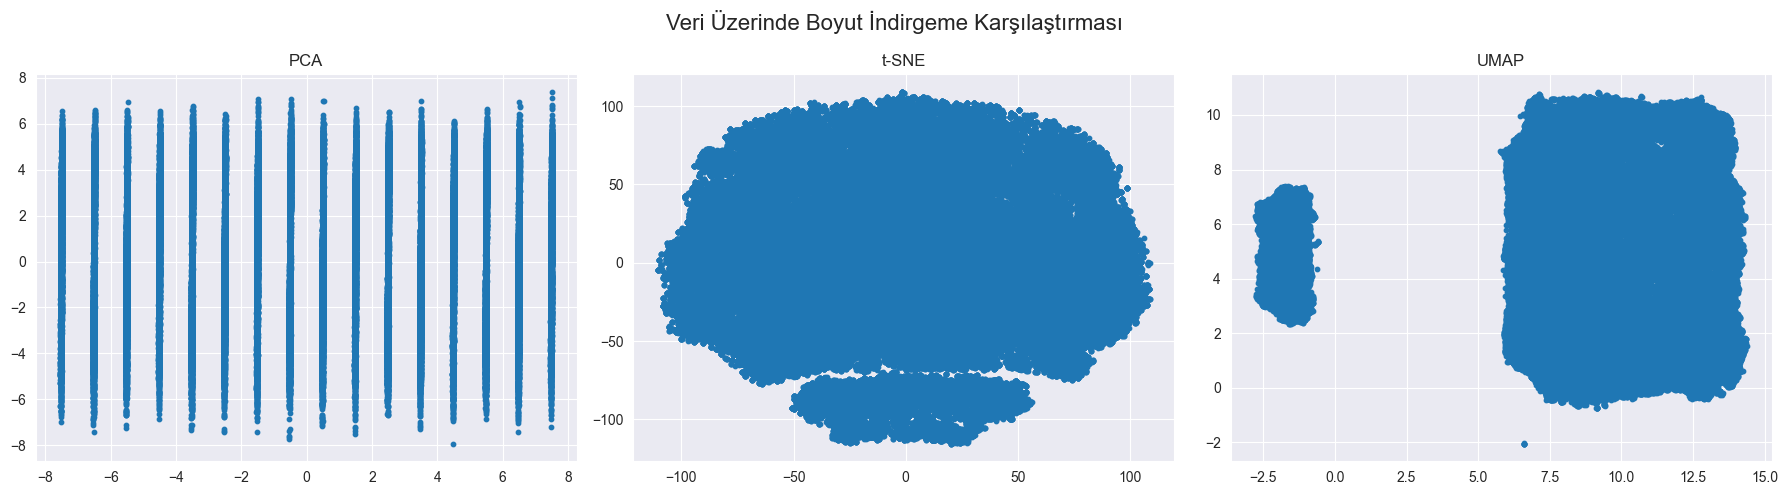

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap





X_scaled = X_train



# 3. PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)


# 5. UMAP
reducer = umap.UMAP(random_state=42)
reducer.fit(X_scaled)

X_umap = reducer.transform(X_scaled)

# 6. Görselleştirme
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1],  cmap='coolwarm', s=10)
axs[0].set_title('PCA')

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='coolwarm', s=10)
axs[1].set_title('t-SNE')

axs[2].scatter(X_umap[:, 0], X_umap[:, 1], cmap='coolwarm', s=10)
axs[2].set_title('UMAP')

plt.suptitle("Veri Üzerinde Boyut İndirgeme Karşılaştırması", fontsize=16)
plt.tight_layout()
plt.show()


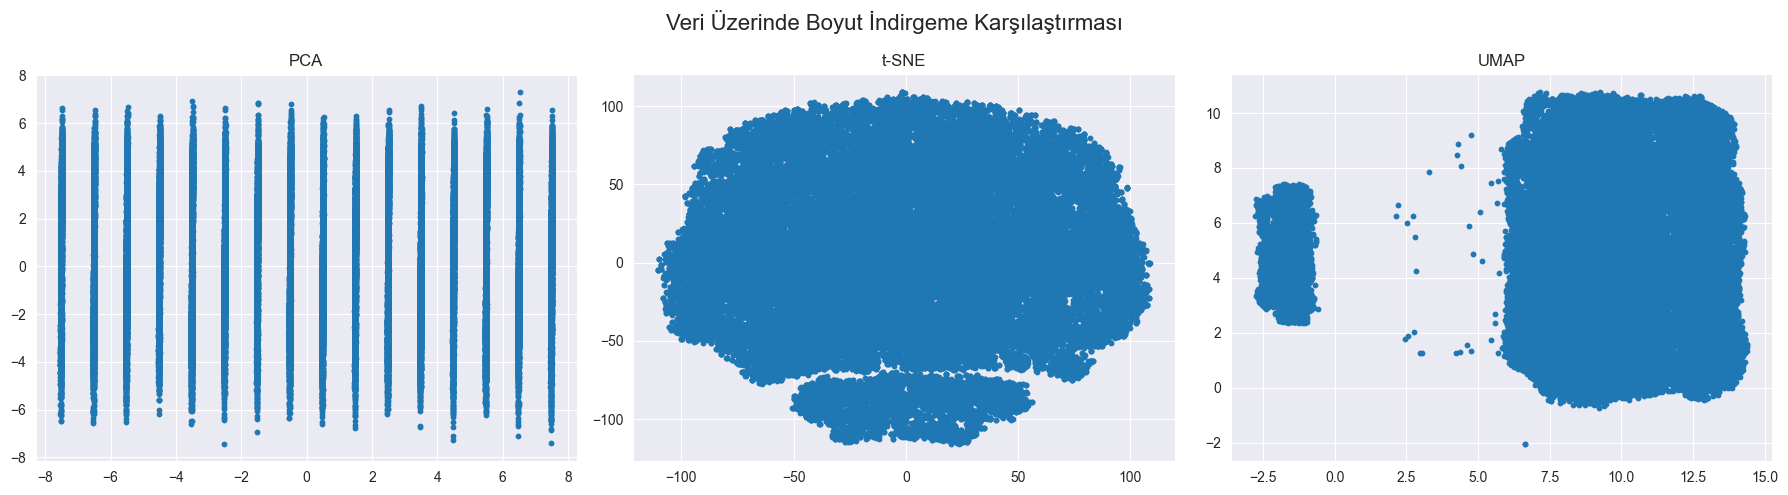

In [68]:
import matplotlib.pyplot as plt






X_scaled = X_test


X_pca_test = pca.transform(X_scaled)




X_umap_test = reducer.transform(X_scaled)

# 6. Görselleştirme
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_test[:, 0], X_pca_test[:, 1],  cmap='coolwarm', s=10)
axs[0].set_title('PCA')

axs[1].scatter(X_tsne_test[:, 0], X_tsne_test[:, 1], cmap='coolwarm', s=10)
axs[1].set_title('t-SNE')

axs[2].scatter(X_umap_test[:, 0], X_umap_test[:, 1], cmap='coolwarm', s=10)
axs[2].set_title('UMAP')

plt.suptitle("Veri Üzerinde Boyut İndirgeme Karşılaştırması", fontsize=16)
plt.tight_layout()
plt.show()


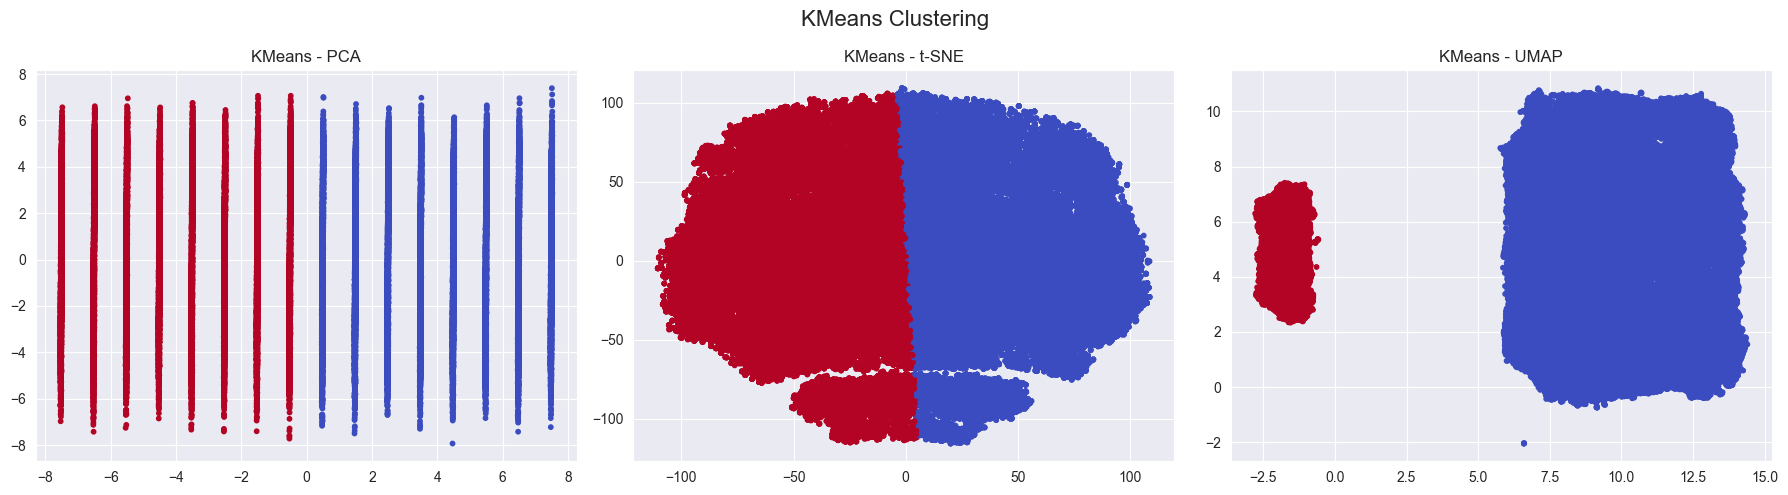

In [69]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
kmeans_umap = KMeans(n_clusters=2, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
labels_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne)
labels_kmeans_umap = kmeans_umap.fit_predict(X_umap)


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca, cmap='coolwarm', s=10)
axs[0].set_title('KMeans - PCA')

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans_tsne, cmap='coolwarm', s=10)
axs[1].set_title('KMeans - t-SNE')

axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_kmeans_umap, cmap='coolwarm', s=10)
axs[2].set_title('KMeans - UMAP')

plt.suptitle("KMeans Clustering", fontsize=16)
plt.tight_layout()
plt.show()


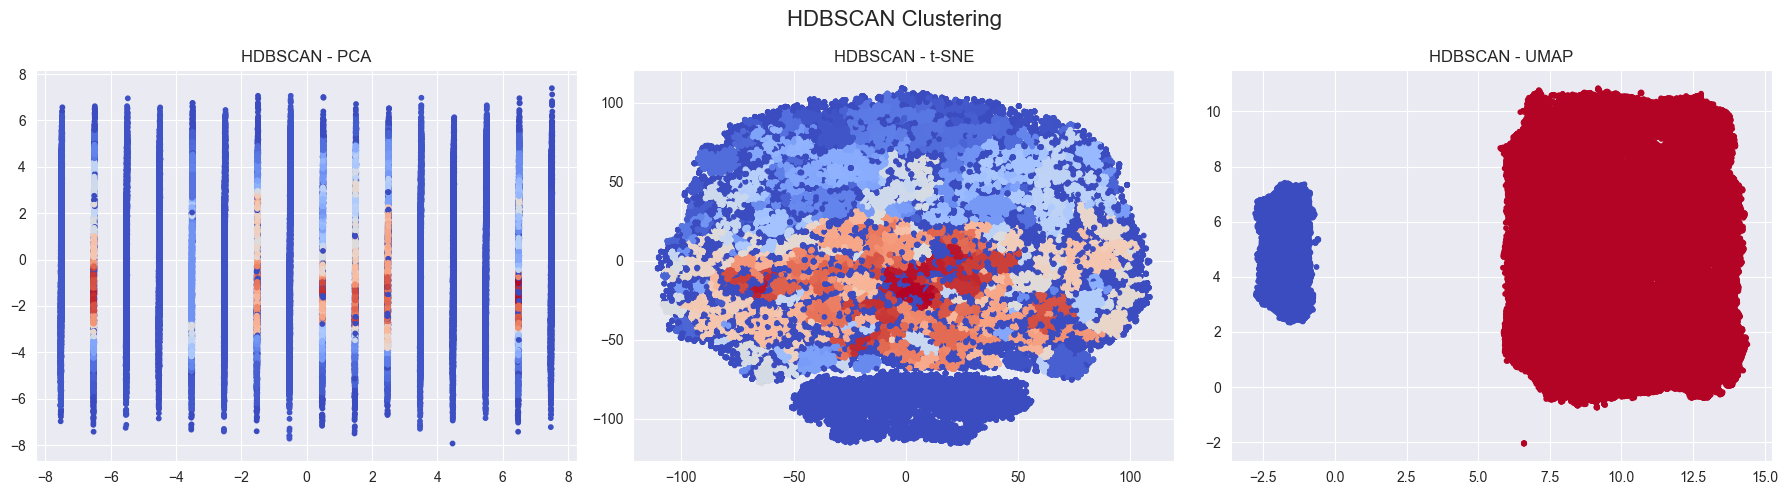

In [70]:
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# HDBSCAN modelini oluştur
hdbscan_pca = HDBSCAN(min_cluster_size=30, min_samples=3, prediction_data=True)
hdbscan_tsne = HDBSCAN(min_cluster_size=30, min_samples=3,  prediction_data=True)
hdbscan_umap = HDBSCAN(min_cluster_size=30, min_samples=3,  prediction_data=True)

# Etiketleri tahmin et
labels_hdbscan_pca = hdbscan_pca.fit_predict(X_pca)
labels_hdbscan_tsne = hdbscan_tsne.fit_predict(X_tsne)
labels_hdbscan_umap = hdbscan_umap.fit_predict(X_umap)

# Görselleştir
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hdbscan_pca, cmap='coolwarm', s=10)
axs[0].set_title('HDBSCAN - PCA')

axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_hdbscan_tsne, cmap='coolwarm', s=10)
axs[1].set_title('HDBSCAN - t-SNE')

axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_hdbscan_umap, cmap='coolwarm', s=10)
axs[2].set_title('HDBSCAN - UMAP')

plt.suptitle("HDBSCAN Clustering", fontsize=16)
plt.tight_layout()
plt.show()


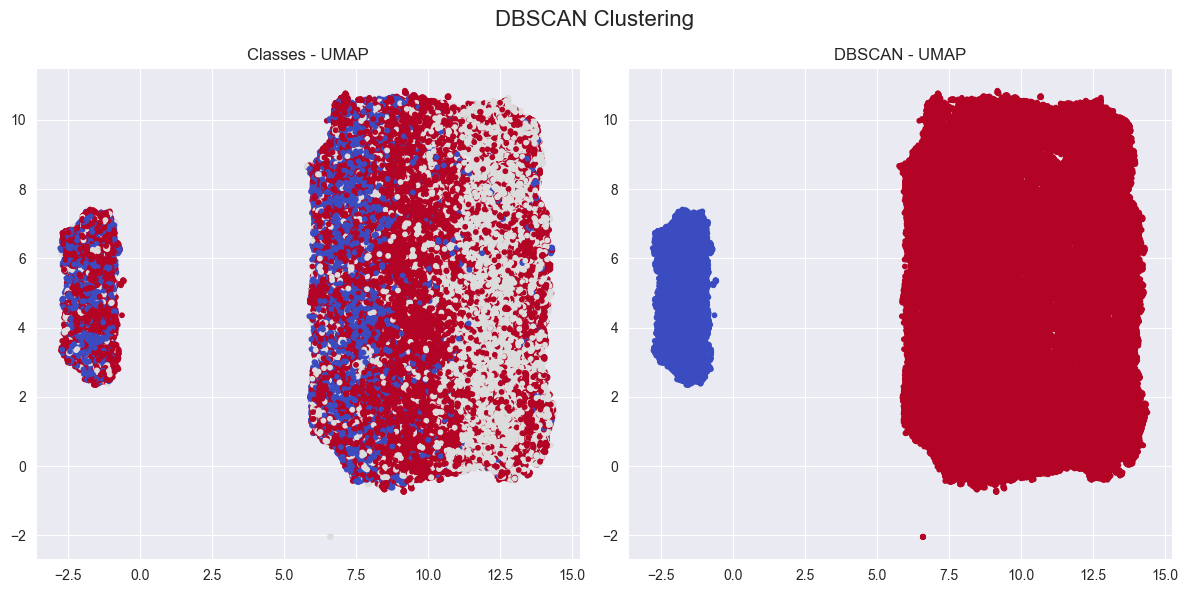

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=target, cmap='coolwarm', s=10)
axs[0].set_title('Classes - UMAP')


axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_hdbscan_umap, cmap='coolwarm', s=10)
axs[1].set_title('DBSCAN - UMAP')

plt.suptitle("DBSCAN Clustering", fontsize=16)
plt.tight_layout()
plt.show()



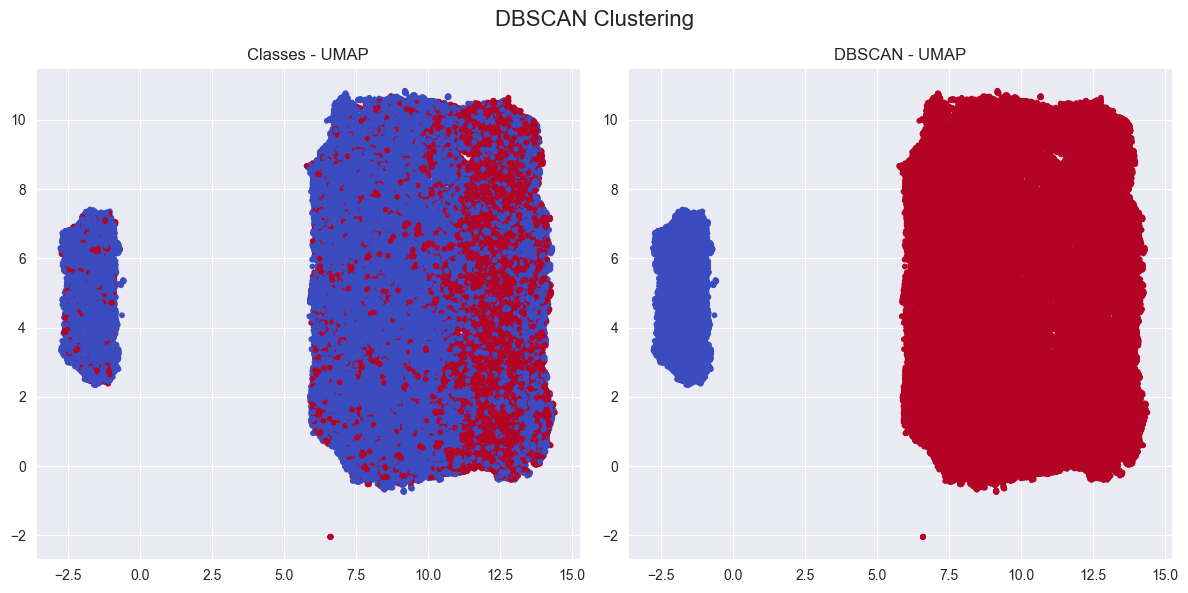

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=target_binary, cmap='coolwarm', s=10)
axs[0].set_title('Classes - UMAP')


axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_hdbscan_umap, cmap='coolwarm', s=10)
axs[1].set_title('DBSCAN - UMAP')

plt.suptitle("DBSCAN Clustering", fontsize=16)
plt.tight_layout()
plt.show()



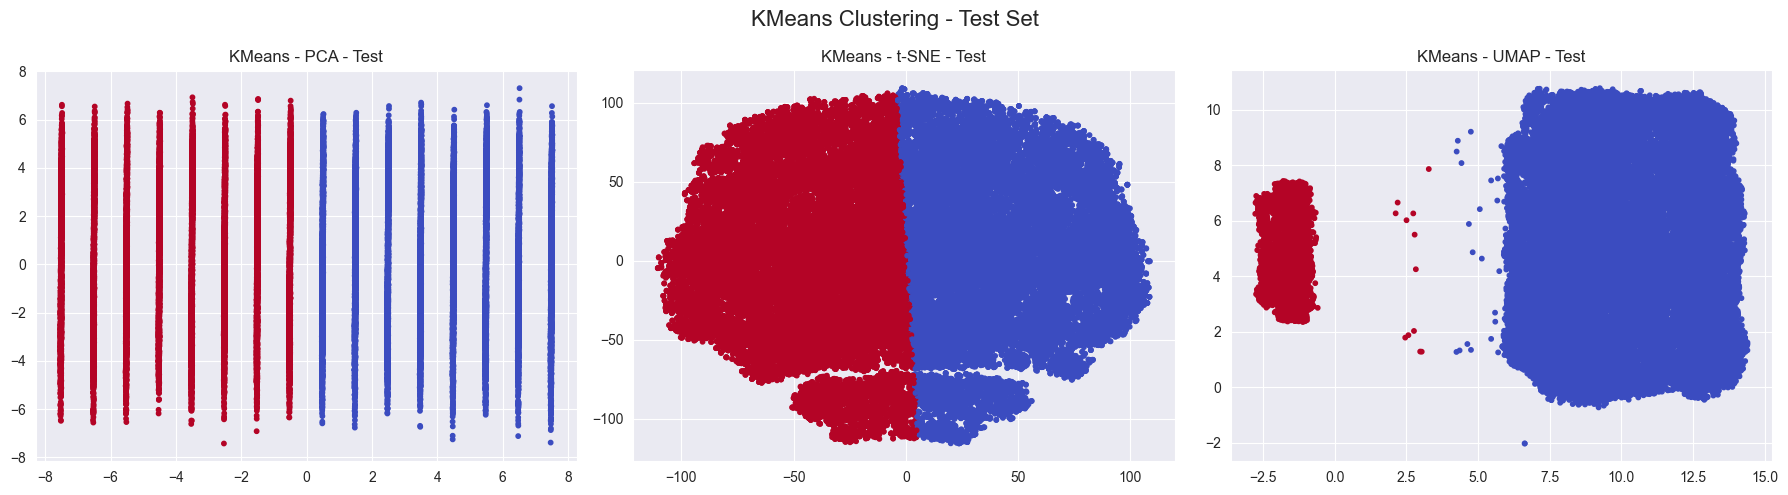

In [73]:
from sklearn.cluster import KMeans


labels_kmeans_pca_test = kmeans_pca.predict(X_pca_test)
labels_kmeans_tsne_test = kmeans_tsne.predict(X_tsne_test)
labels_kmeans_umap_test = kmeans_umap.predict(X_umap_test)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=labels_kmeans_pca_test, cmap='coolwarm', s=10)
axs[0].set_title('KMeans - PCA - Test')

axs[1].scatter(X_tsne_test[:, 0], X_tsne_test[:, 1], c=labels_kmeans_tsne_test, cmap='coolwarm', s=10)
axs[1].set_title('KMeans - t-SNE - Test')

axs[2].scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=labels_kmeans_umap_test, cmap='coolwarm', s=10)
axs[2].set_title('KMeans - UMAP - Test')

plt.suptitle("KMeans Clustering - Test Set", fontsize=16)
plt.tight_layout()
plt.show()

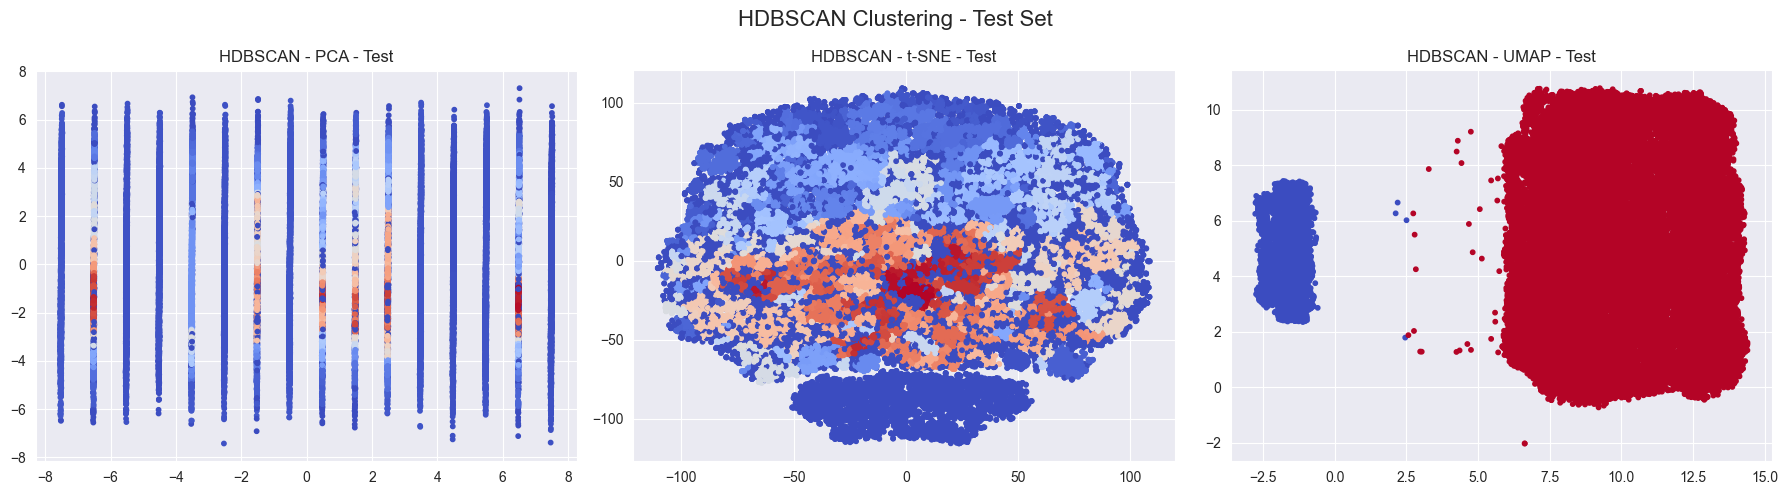

In [74]:
# Test setini approximate_predict ile sınıflandır
from hdbscan.prediction import approximate_predict

labels_hdbscan_pca_test, _ = approximate_predict(hdbscan_pca, X_pca_test)
labels_hdbscan_tsne_test, _ = approximate_predict(hdbscan_tsne, X_tsne_test)
labels_hdbscan_umap_test, _ = approximate_predict(hdbscan_umap, X_umap_test)

# Görselleştirme
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=labels_hdbscan_pca_test, cmap='coolwarm', s=10)
axs[0].set_title('HDBSCAN - PCA - Test')

axs[1].scatter(X_tsne_test[:, 0], X_tsne_test[:, 1], c=labels_hdbscan_tsne_test, cmap='coolwarm', s=10)
axs[1].set_title('HDBSCAN - t-SNE - Test')

axs[2].scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=labels_hdbscan_umap_test, cmap='coolwarm', s=10)
axs[2].set_title('HDBSCAN - UMAP - Test')

plt.suptitle("HDBSCAN Clustering - Test Set", fontsize=16)
plt.tight_layout()
plt.show()

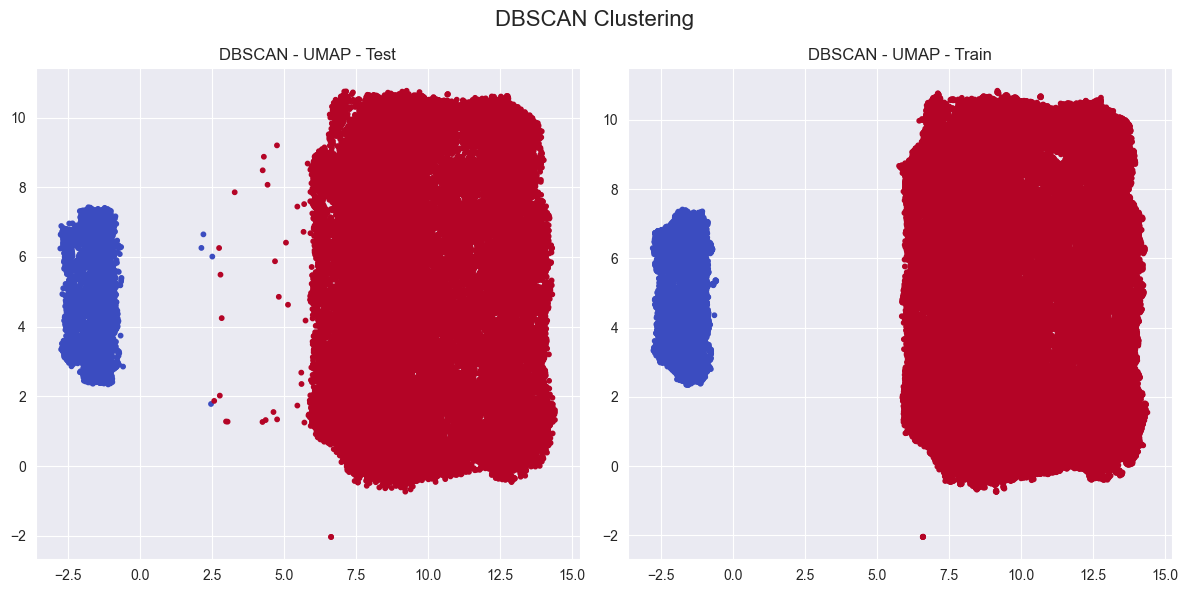

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=labels_hdbscan_umap_test, cmap='coolwarm', s=10)
axs[0].set_title('DBSCAN - UMAP - Test')


axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_hdbscan_umap, cmap='coolwarm', s=10)
axs[1].set_title('DBSCAN - UMAP - Train')

plt.suptitle("DBSCAN Clustering", fontsize=16)
plt.tight_layout()
plt.show()



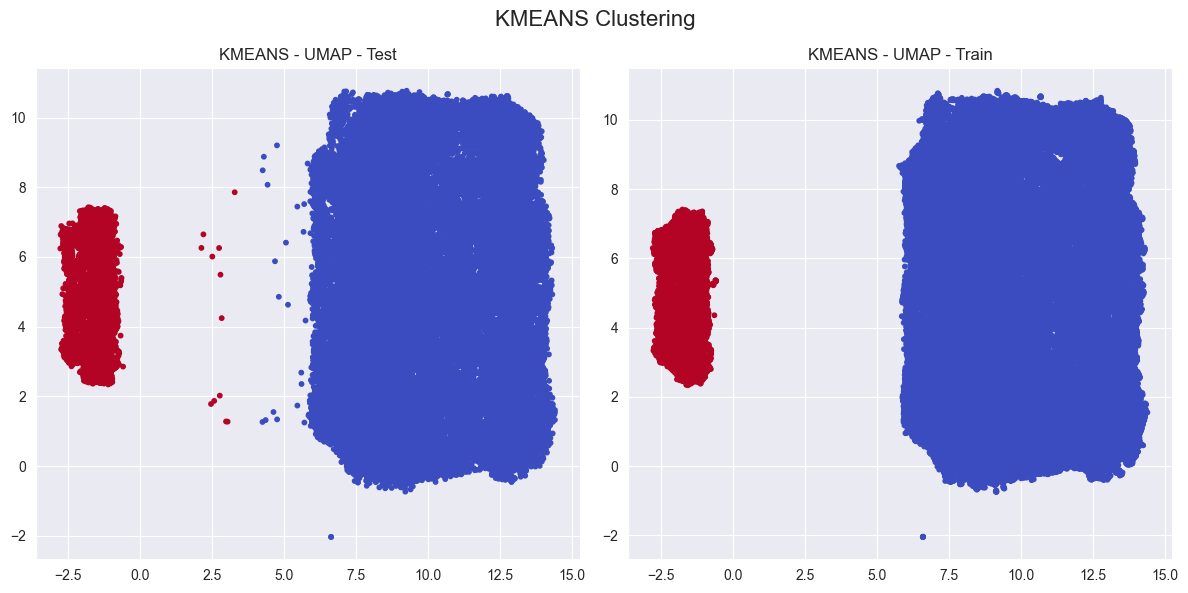

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=labels_kmeans_umap_test, cmap='coolwarm', s=10)
axs[0].set_title('KMEANS - UMAP - Test')


axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=labels_kmeans_umap, cmap='coolwarm', s=10)
axs[1].set_title('KMEANS - UMAP - Train')

plt.suptitle("KMEANS Clustering", fontsize=16)
plt.tight_layout()
plt.show()



In [77]:
df_train_scaled=X_train.copy()
df_test_scaled=X_test.copy()

df_train_scaled["cluster"]=labels_hdbscan_umap
df_test_scaled["cluster"]=labels_hdbscan_umap_test

copy_train["cluster"]=labels_hdbscan_umap
copy_test["cluster"]=labels_hdbscan_umap_test

In [78]:
df_train_scaled["cluster"].value_counts()

cluster
1    89408
0    10592
Name: count, dtype: int64

In [79]:
df_test_scaled["cluster"].value_counts()

cluster
1    44986
0     5014
Name: count, dtype: int64

=== TRAIN CLUSTER ÖZETİ ===
          Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
cluster                                                                  
0        0.24           0.37                   0.39              -0.45   
1       -0.12          -0.01                   0.01               0.05   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
cluster                                                                     
0                  -0.33          -0.60        -3.00                -0.49   
1                   0.05           0.04         0.10                 0.09   

         Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Mapped  \
cluster                                                ...                      
0                         -0.50                 -0.38  ...               1.44   
1                          0.03                  0.04  ...               1.01   

         Auto Loan  Credit-Builder Loan  

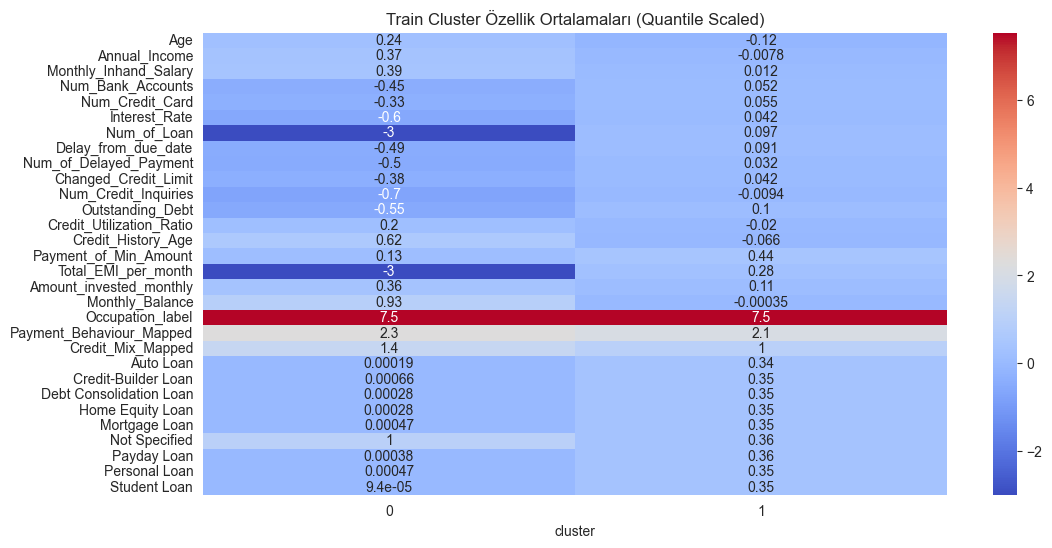

=== TEST CLUSTER ÖZETİ ===
          Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
cluster                                                                  
0        0.28           0.36                   0.25              -0.44   
1       -0.06          -0.00                  -0.07               0.05   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
cluster                                                                     
0                  -0.34          -0.60        -3.00                -0.49   
1                   0.06           0.03         0.08                 0.09   

         Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Mapped  \
cluster                                                ...                      
0                         -0.49                 -0.38  ...               1.45   
1                          0.03                  0.03  ...               1.01   

         Auto Loan  Credit-Builder Loan  D

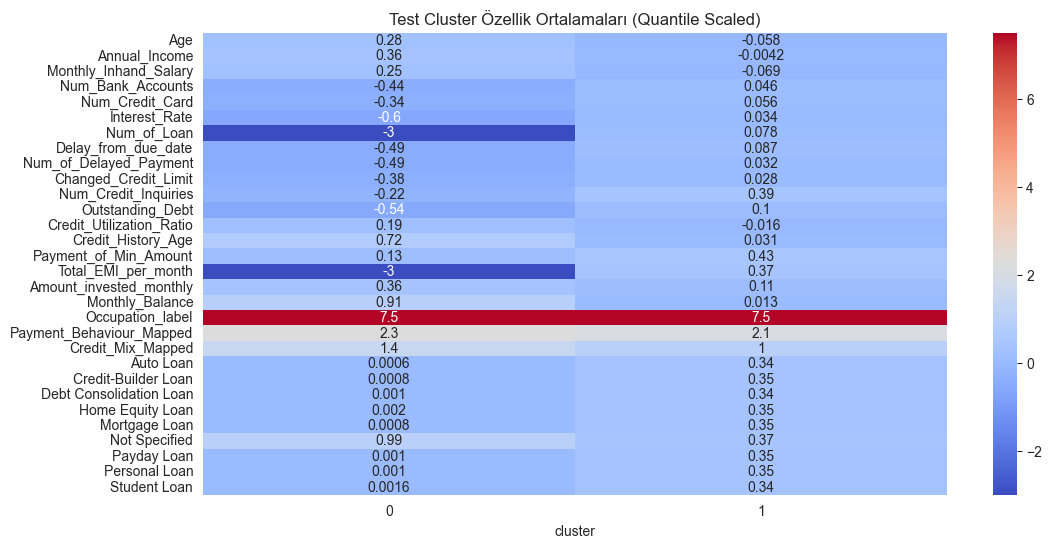

In [80]:
# Cluster ortalamalarını al (zaten quantile transform uygulanmış hali)
cluster_summary_train = df_train_scaled.groupby("cluster").mean()

print("=== TRAIN CLUSTER ÖZETİ ===")
print(cluster_summary_train)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary_train.T, cmap="coolwarm", annot=True)
plt.title("Train Cluster Özellik Ortalamaları (Quantile Scaled)")
plt.show()

cluster_summary_test = df_test_scaled.groupby("cluster").mean()

print("=== TEST CLUSTER ÖZETİ ===")
print(cluster_summary_test)
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary_test.T, cmap="coolwarm", annot=True)
plt.title("Test Cluster Özellik Ortalamaları (Quantile Scaled)")
plt.show()


In [81]:
cluster_to_label = {
    0: "Approved",
    1: "Rejected"

}
df_train_scaled["pseudo_label_named"] = df_train_scaled["cluster"].map(cluster_to_label)
df_test_scaled["pseudo_label_named"] = df_test_scaled["cluster"].map(cluster_to_label)

copy_train["pseudo_label_named"]=df_train_scaled["pseudo_label_named"]
copy_test["pseudo_label_named"]=df_test_scaled["pseudo_label_named"]

In [83]:
copy_train.to_csv("pseudo_label_named_train.csv", index=False, encoding="utf-8")

copy_test.to_csv("pseudo_label_named_test.csv", index=False, encoding="utf-8")

In [84]:
print(df_train_scaled["pseudo_label_named"].unique())
print(df_test_scaled["pseudo_label_named"].unique())

['Rejected' 'Approved']
['Rejected' 'Approved']


In [85]:
print(df_train_scaled["pseudo_label_named"].value_counts())
print(df_test_scaled["pseudo_label_named"].value_counts())


pseudo_label_named
Rejected    89408
Approved    10592
Name: count, dtype: int64
pseudo_label_named
Rejected    44986
Approved     5014
Name: count, dtype: int64


In [86]:
X_train_model = df_train_scaled.drop(columns=["cluster","pseudo_label_named"])
y_train_model = df_train_scaled["cluster"]

X_test_model = df_test_scaled.drop(columns=["cluster","pseudo_label_named"])
y_test_model = df_test_scaled["cluster"]


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_model, y_train_model)

y_pred = clf.predict(X_test_model)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5014
           1       1.00      1.00      1.00     44986

    accuracy                           1.00     50000
   macro avg       1.00      0.99      1.00     50000
weighted avg       1.00      1.00      1.00     50000



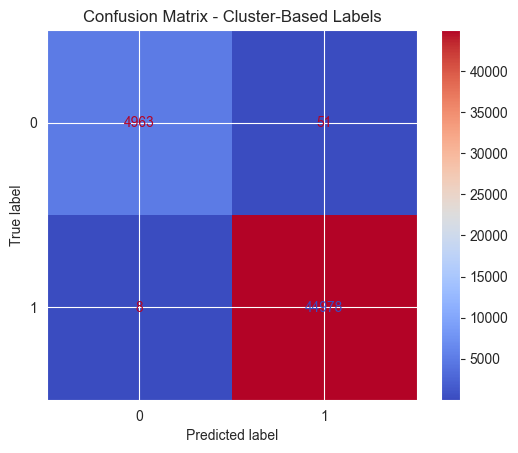

In [88]:
print(classification_report(y_test_model, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test_model, y_pred, cmap="coolwarm")
plt.title("Confusion Matrix - Cluster-Based Labels")
plt.show()


In [89]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(clf, X_train_model, y_train_model, cv=5)
print(cv.mean())

0.9996700000000001


In [90]:
from sklearn.model_selection import train_test_split

# Cluster label'ı target olarak alacağız
X_train_full = df_train_scaled.drop(columns=["cluster","pseudo_label_named"])
y_train_full = df_train_scaled["cluster"]

# %80 eğitim - %20 validation bölmesi
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

=== Validation Sonuçları ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2118
           1       1.00      1.00      1.00     17882

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



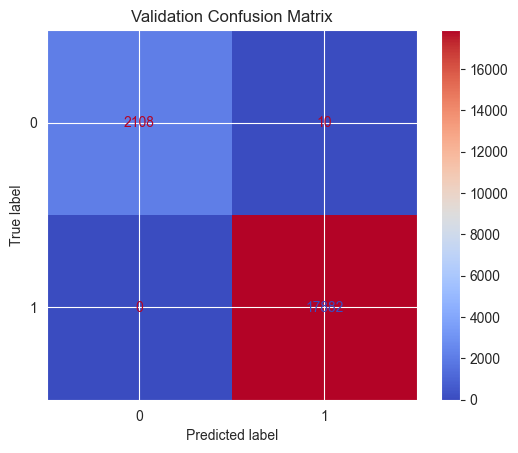

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_train_val = RandomForestClassifier(n_estimators=100, random_state=42)
clf_train_val.fit(X_train_split, y_train_split)

y_val_pred = clf_train_val.predict(X_val_split)

# Rapor
print("=== Validation Sonuçları ===")
print(classification_report(y_val_split, y_val_pred))

ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred, cmap="coolwarm")
plt.title("Validation Confusion Matrix")
plt.show()


In [92]:
from sklearn.model_selection import train_test_split

X_test_model = df_test_scaled.drop(columns=["cluster","pseudo_label_named"])
y_test_model = df_test_scaled["cluster"]

X_test_split, X_val_test_split, y_test_split, y_val_test_split = train_test_split(
    X_test_model, y_test_model, test_size=0.2, stratify=y_test_model, random_state=42
)


=== TEST SETI İÇİN VALIDATION SONUÇLARI ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00      8997

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



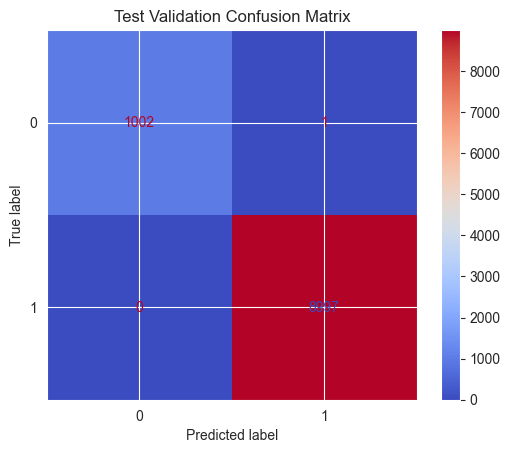

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_test_val = RandomForestClassifier(n_estimators=100, random_state=42)
clf_test_val.fit(X_val_test_split, y_val_test_split)
y_val_pred_test = clf_test_val.predict(X_val_test_split)

print("=== TEST SETI İÇİN VALIDATION SONUÇLARI ===")
print(classification_report(y_val_test_split, y_val_pred_test))

ConfusionMatrixDisplay.from_predictions(y_val_test_split, y_val_pred_test, cmap="coolwarm")
plt.title("Test Validation Confusion Matrix")
plt.show()


In [94]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, X_data, title="Feature Importances"):
    feature_importance = pd.DataFrame({
        "feature": X_data.columns,
        "importance": model.feature_importances_
    }).sort_values(by="importance", ascending=False)

    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance["feature"].head(20), feature_importance["importance"].head(20))
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

    return feature_importance


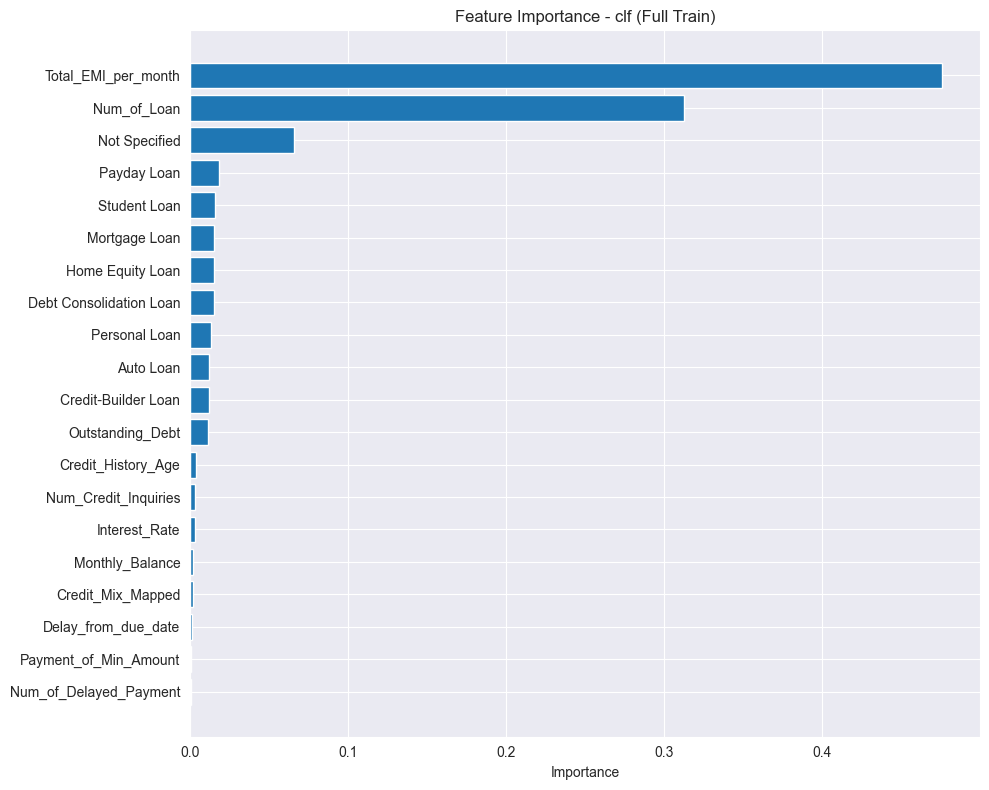

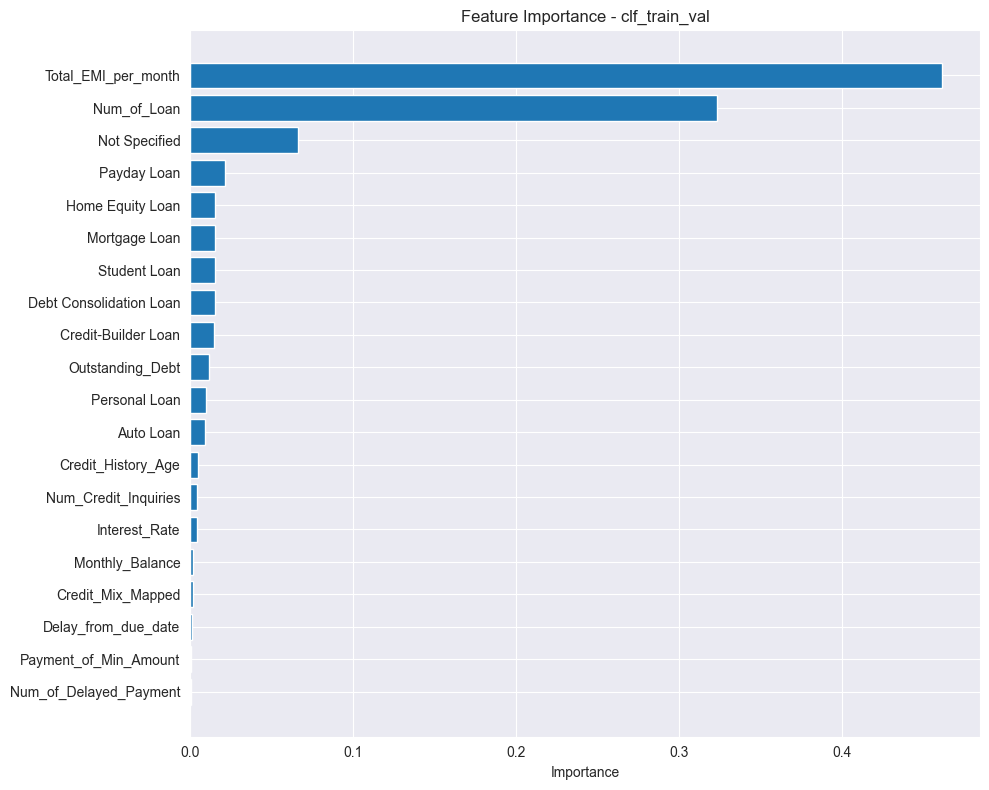

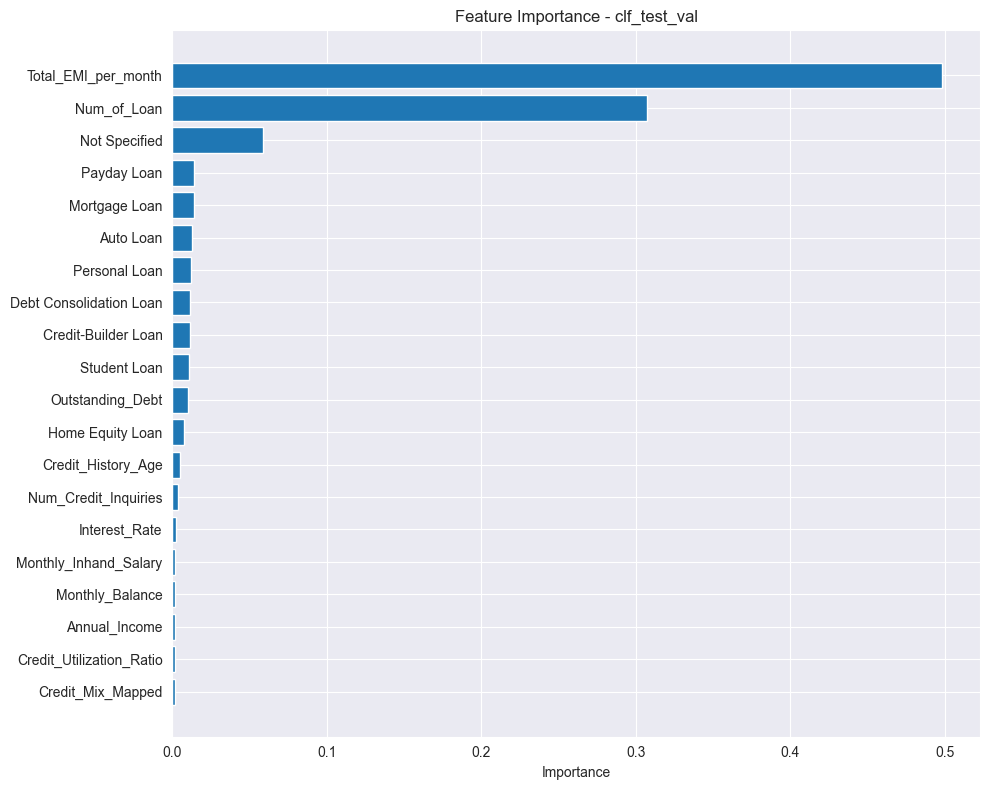

In [95]:
# Tam model
importance_clf = plot_feature_importance(clf, X_train_model, "Feature Importance - clf (Full Train)")

# Train içi val modeli
importance_clf_train_val = plot_feature_importance(clf_train_val, X_train_split, "Feature Importance - clf_train_val")

# Test içi val modeli
importance_clf_test_val = plot_feature_importance(clf_test_val, X_test_split, "Feature Importance - clf_test_val")


In [96]:
leaky_features = [
    "Total_EMI_per_month",
    "Num_of_Loan"  # istersen bu da
]

X_train_model_clean = X_train_model.drop(columns=leaky_features)
X_test_model_clean = X_test_model.drop(columns=leaky_features)

X_train_split_clean=X_train_split.drop(columns=leaky_features)
X_val_split_clean=X_val_split.drop(columns=leaky_features)

X_test_split_clean=X_test_split.drop(columns=leaky_features)
X_val_test_split_clean=X_val_test_split.drop(columns=leaky_features)


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      5014
           1       1.00      0.98      0.99     44986

    accuracy                           0.98     50000
   macro avg       0.93      0.99      0.95     50000
weighted avg       0.98      0.98      0.98     50000



Text(0.5, 1.0, 'Confusion Matrix - Clean clf (Full Train)')

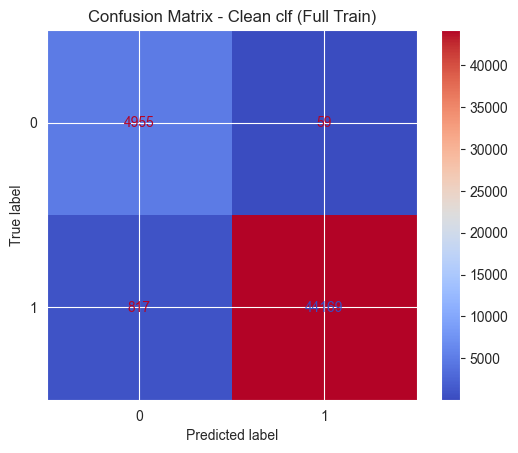

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_clean = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
clf_clean.fit(X_train_model_clean, y_train_model)

y_pred_clean = clf_clean.predict(X_test_model_clean)
print(classification_report(y_test_model, y_pred_clean))

ConfusionMatrixDisplay.from_predictions(y_test_model, y_pred_clean, cmap="coolwarm")
plt.title("Confusion Matrix - Clean clf (Full Train)")

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2118
           1       1.00      0.99      0.99     17882

    accuracy                           0.99     20000
   macro avg       0.94      0.99      0.96     20000
weighted avg       0.99      0.99      0.99     20000



Text(0.5, 1.0, 'Confusion Matrix - Clean clf (Train Validation)')

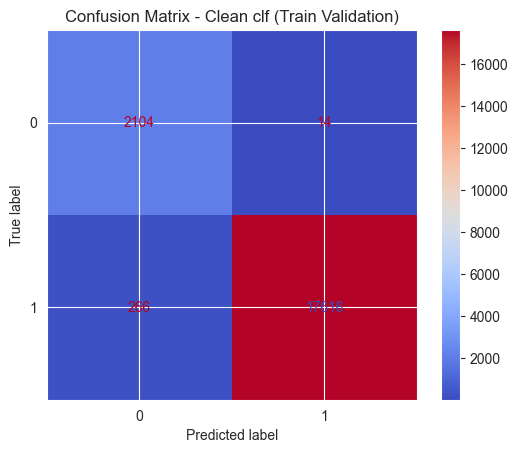

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_train_val_clean = RandomForestClassifier(n_estimators=100, random_state=42)

clf_train_val_clean.fit(X_train_split_clean, y_train_split)

y_val_pred_clean = clf_train_val_clean.predict(X_val_split_clean)
print(classification_report(y_val_split, y_val_pred_clean))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_clean, cmap="coolwarm")
plt.title("Confusion Matrix - Clean clf (Train Validation)")

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1003
           1       1.00      0.98      0.99      8997

    accuracy                           0.98     10000
   macro avg       0.91      0.98      0.94     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Confusion Matrix - Clean clf (Test Validation)')

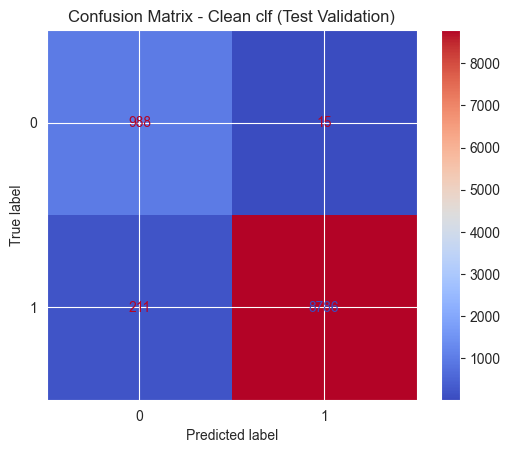

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_test_val_clean = RandomForestClassifier(n_estimators=100, random_state=42)

clf_test_val_clean.fit(X_test_split_clean, y_test_split)


y_pred_test_clean = clf_test_val_clean.predict(X_val_test_split_clean)

print(classification_report(y_val_test_split, y_pred_test_clean))
ConfusionMatrixDisplay.from_predictions(y_val_test_split, y_pred_test_clean, cmap="coolwarm")
plt.title("Confusion Matrix - Clean clf (Test Validation)")

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      5014
           1       1.00      0.98      0.99     44986

    accuracy                           0.98     50000
   macro avg       0.93      0.99      0.95     50000
weighted avg       0.98      0.98      0.98     50000



Text(0.5, 1.0, 'Confusion Matrix - Clean clf (Full Train)')

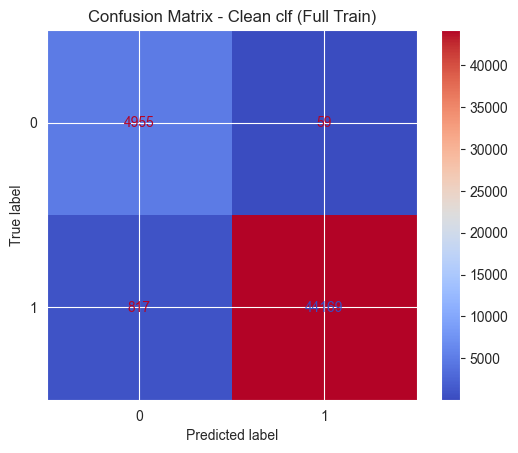

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_clean = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
clf_clean.fit(X_train_model_clean, y_train_model)

y_pred_clean = clf_clean.predict(X_test_model_clean)
print(classification_report(y_test_model, y_pred_clean))

ConfusionMatrixDisplay.from_predictions(y_test_model, y_pred_clean, cmap="coolwarm")
plt.title("Confusion Matrix - Clean clf (Full Train)")

cluster
1    89408
0    89408
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5014
           1       1.00      0.97      0.99     44986

    accuracy                           0.98     50000
   macro avg       0.91      0.98      0.94     50000
weighted avg       0.98      0.98      0.98     50000



Text(0.5, 1.0, 'Confusion Matrix - Clean clf SMOTED (Full Train)')

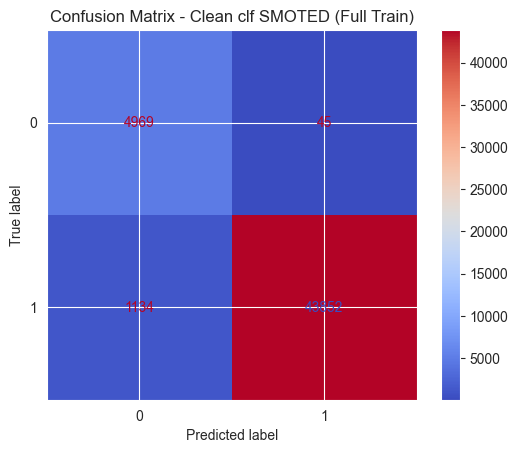

In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_model_clean_resampled, y_train_model_resampled = smote.fit_resample(X_train_model_clean, y_train_model)

clf_clean = RandomForestClassifier(n_estimators=100, random_state=42,class_weight="balanced")
clf_clean.fit(X_train_model_clean_resampled, y_train_model_resampled)

print(y_train_model_resampled.value_counts())

y_pred_clean = clf_clean.predict(X_test_model_clean)
print(classification_report(y_test_model, y_pred_clean))

ConfusionMatrixDisplay.from_predictions(y_test_model, y_pred_clean, cmap="coolwarm")
plt.title("Confusion Matrix - Clean clf SMOTED (Full Train)")

In [102]:
X_train_leaky = X_train_model[leaky_features]
X_test_leaky = X_test_model[leaky_features]



pca = PCA(n_components=1)
X_train_leaky_pca = pca.fit_transform(X_train_leaky)
X_test_leaky_pca = pca.transform(X_test_leaky)

# DataFrame olarak döndür
X_train_model["leaky_compressed"] = X_train_leaky_pca
X_test_model["leaky_compressed"] = X_test_leaky_pca

In [103]:
X_train_model_not_leaky=X_train_model.drop(columns=leaky_features)
X_test_model_not_leaky=X_test_model.drop(columns=leaky_features)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5014
           1       1.00      1.00      1.00     44986

    accuracy                           1.00     50000
   macro avg       1.00      0.99      1.00     50000
weighted avg       1.00      1.00      1.00     50000



Text(0.5, 1.0, 'Confusion Matrix - Clean clf (Not Leaky)')

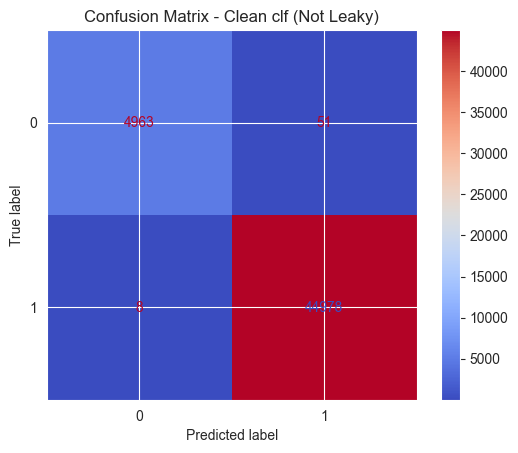

In [104]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf_not_leaky = RandomForestClassifier(n_estimators=100, random_state=42)
clf_not_leaky.fit(X_train_model_not_leaky, y_train_model)

y_pred_not_leaky = clf_not_leaky.predict(X_test_model_not_leaky)
print(classification_report(y_test_model, y_pred_not_leaky))

ConfusionMatrixDisplay.from_predictions(y_test_model, y_pred_not_leaky, cmap="coolwarm")
plt.title("Confusion Matrix - Clean clf (Not Leaky)")

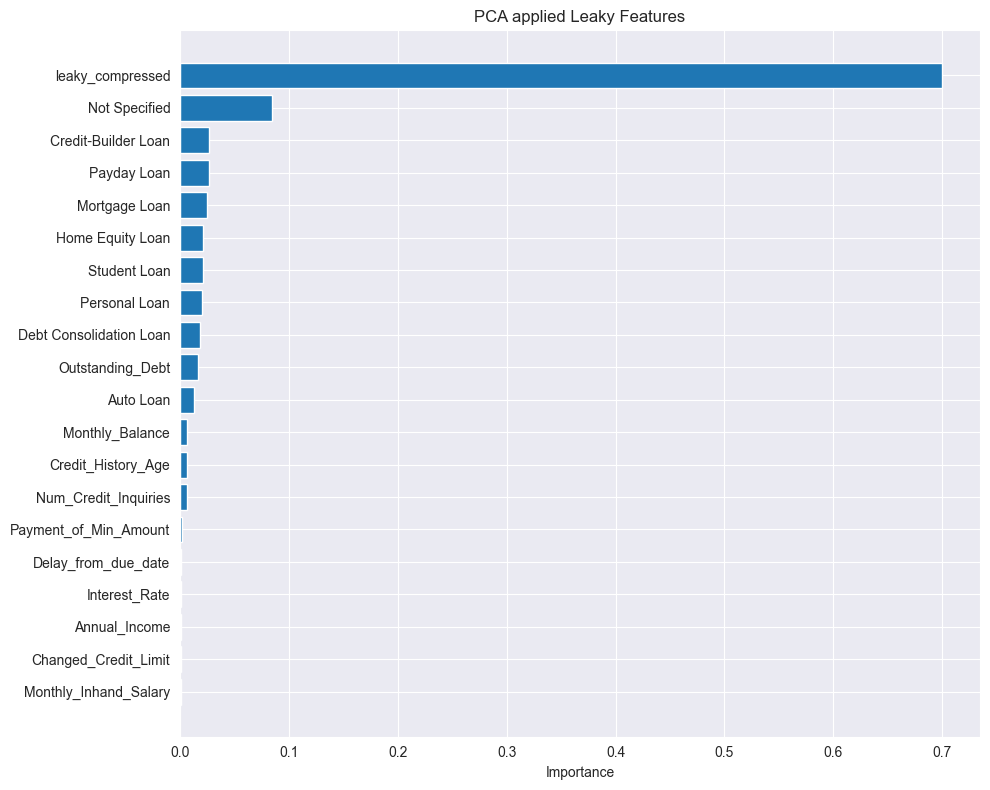

feature  importance
28          leaky_compressed        0.70
24             Not Specified        0.08
20       Credit-Builder Loan        0.03
25               Payday Loan        0.03
23             Mortgage Loan        0.02
22          Home Equity Loan        0.02
27              Student Loan        0.02
26             Personal Loan        0.02
21   Debt Consolidation Loan        0.02
10          Outstanding_Debt        0.02
19                 Auto Loan        0.01
15           Monthly_Balance        0.01
12        Credit_History_Age        0.01
9       Num_Credit_Inquiries        0.01
13     Payment_of_Min_Amount        0.00
6        Delay_from_due_date        0.00
5              Interest_Rate        0.00
1              Annual_Income        0.00
8       Changed_Credit_Limit        0.00
2      Monthly_Inhand_Salary        0.00
11  Credit_Utilization_Ratio        0.00
4            Num_Credit_Card        0.00
0                        Age        0.00
18         Credit_Mix_Mapped        0.00
14   Amount_invested_monthly        0.00
16          Occupation_label        0.00
7     Num_of_Delayed_Payment        0.00
3          Num_Bank_Accounts        0.00
17  Payment_Behaviour_Mapped        0.00

In [105]:
import pickle



with open("../models/quantile_scaler.pkl", "wb") as f:
    pickle.dump(quantile_scaler, f)
plot_feature_importance(clf_not_leaky,X_train_model_not_leaky, "PCA applied Leaky Features")

In [106]:
import pickle

with open("../models/leaky_pca.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("../models/quantile_scaler.pkl", "wb") as f:
    pickle.dump(quantile_scaler, f)

with open("../models/pseudo_label_model.pkl", "wb") as f:
    pickle.dump(clf_not_leaky, f)
